In [45]:
pbr7_16S_data = 'C:/Users/klbal/Desktop/Internship #2/my_data/pbr7_16S_data.txt'

pbr7_16S_Chlamy_or_Bac_data = 'C:/Users/klbal/Desktop/Internship #2/my_data/pbr7_16S_Chlamy_or_Bac_data.txt'

pbr7_syncom_cnv_data = 'C:/Users/klbal/Desktop/Internship #2/my_data/pbr7_syncom_cnv_data.txt'

In [46]:
#pip install networkx


Note: you may need to restart the kernel to use updated packages.


In [47]:
with open(pbr7_16S_data, 'r') as file:
    lines = file.readlines()[:20]

for line in lines:
    print(line.strip())  # strip() entfernt führende und nachfolgende Leerzeichen und Zeilenumbrüche


"day"	"tube"	"ID"	"counts"
1	1	"Chlamy107"	6
1	1	"Chlamy125"	50
1	1	"Chlamy165"	2
1	1	"Chlamy23"	0
1	1	"Chlamy26"	4
1	1	"Chlamy28"	3
1	1	"Chlamy44"	2
1	1	"Chlamy75"	1
1	1	"Chlamy88"	4
1	1	"Chlamy90"	4
1	1	"Chlamy123"	0
1	1	"Chlamy24"	0
1	1	"Chlamy43"	0
1	1	"Chlamy19"	0
1	1	"Chlamy7"	0
1	1	"Chlamy74"	0
1	1	"Chlamy8"	0
1	1	"Chlamy6"	0
1	1	"Chlamy45"	0


In [48]:
with open(pbr7_16S_Chlamy_or_Bac_data, 'r') as file:
    lines = file.readlines()[:20]

for line in lines:
    print(line.strip())


"tube"	"day"	"chl.or.bac"	"counts"
1	0	"Chlamydomonas"	NA
1	0	"Bacteria"	NA
2	0	"Chlamydomonas"	NA
2	0	"Bacteria"	NA
3	0	"Chlamydomonas"	NA
3	0	"Bacteria"	NA
4	0	"Chlamydomonas"	NA
4	0	"Bacteria"	NA
5	0	"Chlamydomonas"	NA
5	0	"Bacteria"	NA
6	0	"Chlamydomonas"	NA
6	0	"Bacteria"	NA
7	0	"Chlamydomonas"	NA
7	0	"Bacteria"	NA
8	0	"Chlamydomonas"	NA
8	0	"Bacteria"	NA
1	1	"Chlamydomonas"	74
1	1	"Bacteria"	76
2	1	"Chlamydomonas"	NA


In [49]:
with open(pbr7_syncom_cnv_data, 'r') as file:
    lines = file.readlines()

for line in lines:
    print(line.strip())  # strip() entfernt führende und nachfolgende Leerzeichen und Zeilenumbrüche


"ID"	"16S_copies"
"Chlamy107"	6
"Chlamy125"	6
"Chlamy165"	6
"Chlamy23"	8
"Chlamy26"	10
"Chlamy28"	3
"Chlamy44"	10
"Chlamy75"	1
"Chlamy88"	5
"Chlamy90"	6
"Chlamy123"	4
"Chlamy24"	3
"Chlamy43"	4
"Chlamy19"	3
"Chlamy7"	1
"Chlamy74"	3
"Chlamy8"	2
"Chlamy6"	3
"Chlamy45"	7
"Chlamy77"	7
"Contam1"	1
"Contam2"	1


In [50]:
# merge datasets


import pandas as pd
import numpy as np

pbr7_16S_df = pd.read_csv(pbr7_16S_data, delimiter='\t')
pbr7_syncom_cnv_df = pd.read_csv(pbr7_syncom_cnv_data, delimiter='\t')


merged_df = pd.merge(pbr7_16S_df, pbr7_syncom_cnv_df, on='ID')

print(merged_df)

       day  tube         ID  counts  16S_copies
0        1     1  Chlamy107     6.0           6
1        1     1  Chlamy125    50.0           6
2        1     1  Chlamy165     2.0           6
3        1     1   Chlamy23     0.0           8
4        1     1   Chlamy26     4.0          10
...    ...   ...        ...     ...         ...
26219  149     8    Chlamy6     2.0           3
26220  149     8   Chlamy45     0.0           7
26221  149     8   Chlamy77     0.0           7
26222  149     8    Contam1   109.0           1
26223  149     8    Contam2     7.0           1

[26224 rows x 5 columns]


In [51]:
# Normalize -> devide raw counts by 16S gene copies

merged_df["normalized_counts"] = merged_df["counts"] / merged_df["16S_copies"]

print(merged_df)

       day  tube         ID  counts  16S_copies  normalized_counts
0        1     1  Chlamy107     6.0           6           1.000000
1        1     1  Chlamy125    50.0           6           8.333333
2        1     1  Chlamy165     2.0           6           0.333333
3        1     1   Chlamy23     0.0           8           0.000000
4        1     1   Chlamy26     4.0          10           0.400000
...    ...   ...        ...     ...         ...                ...
26219  149     8    Chlamy6     2.0           3           0.666667
26220  149     8   Chlamy45     0.0           7           0.000000
26221  149     8   Chlamy77     0.0           7           0.000000
26222  149     8    Contam1   109.0           1         109.000000
26223  149     8    Contam2     7.0           1           7.000000

[26224 rows x 6 columns]


In [52]:
merged_df.to_csv('my_merge.txt', sep='\t', index=False)


In [53]:
# plot over time -> get rid of contaminations

#replace NAs with 0

merged_df['normalized_counts'].fillna(0, inplace=True)
print(merged_df)

       day  tube         ID  counts  16S_copies  normalized_counts
0        1     1  Chlamy107     6.0           6           1.000000
1        1     1  Chlamy125    50.0           6           8.333333
2        1     1  Chlamy165     2.0           6           0.333333
3        1     1   Chlamy23     0.0           8           0.000000
4        1     1   Chlamy26     4.0          10           0.400000
...    ...   ...        ...     ...         ...                ...
26219  149     8    Chlamy6     2.0           3           0.666667
26220  149     8   Chlamy45     0.0           7           0.000000
26221  149     8   Chlamy77     0.0           7           0.000000
26222  149     8    Contam1   109.0           1         109.000000
26223  149     8    Contam2     7.0           1           7.000000

[26224 rows x 6 columns]


C:\Users\klbal\AppData\Local\Temp\ipykernel_9624\2326766499.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['normalized_counts'].fillna(0, inplace=True)


In [54]:
import matplotlib.pyplot as plt

In [55]:
tube_data = {}
for tube_num in range(1, 9):  # Assuming tube numbers range from 1 to 8
    tube_data[tube_num] = merged_df[merged_df['tube'] == tube_num]

print(tube_data)

{1:        day  tube         ID  counts  16S_copies  normalized_counts
0        1     1  Chlamy107     6.0           6           1.000000
1        1     1  Chlamy125    50.0           6           8.333333
2        1     1  Chlamy165     2.0           6           0.333333
3        1     1   Chlamy23     0.0           8           0.000000
4        1     1   Chlamy26     4.0          10           0.400000
...    ...   ...        ...     ...         ...                ...
26065  149     1    Chlamy6    28.0           3           9.333333
26066  149     1   Chlamy45     0.0           7           0.000000
26067  149     1   Chlamy77     1.0           7           0.142857
26068  149     1    Contam1    47.0           1          47.000000
26069  149     1    Contam2     0.0           1           0.000000

[3278 rows x 6 columns], 2:        day  tube         ID  counts  16S_copies  normalized_counts
22       1     2  Chlamy107     NaN           6           0.000000
23       1     2  Chlamy125  

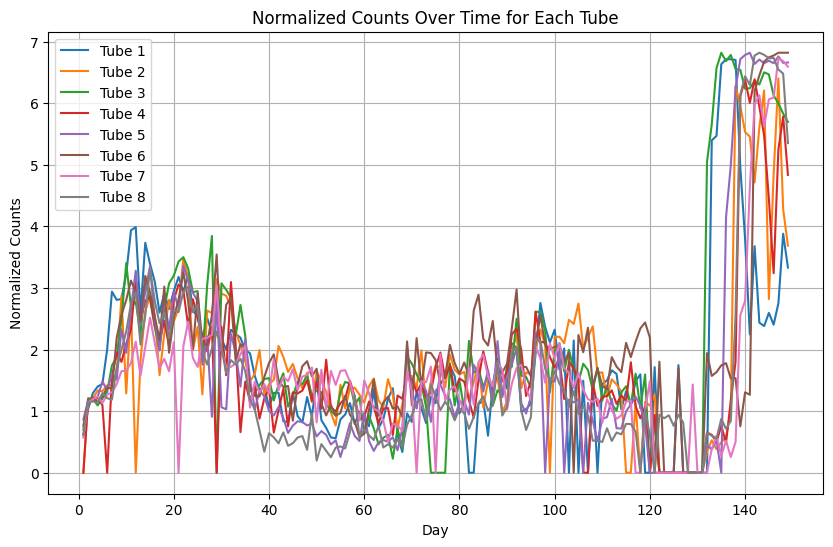

In [56]:
plt.figure(figsize=(10, 6))  
for tube_num, data in tube_data.items():
    grouped_data = data.groupby('day')['normalized_counts'].mean()  # Group by day and calculate mean
    plt.plot(grouped_data.index, grouped_data.values, label=f'Tube {tube_num}')

plt.xlabel('Day')
plt.ylabel('Normalized Counts')
plt.title('Normalized Counts Over Time for Each Tube')
plt.legend()
plt.grid(True)
plt.show()

Small range because contaminations are included in the mean

In [57]:
# subset
subset_contam = merged_df[merged_df['ID'].isin(['Contam1', 'Contam2'])]

# Untermenge ohne Contam1 und Contam2
subset_no_contam = merged_df[~merged_df['ID'].isin(['Contam1', 'Contam2'])]

print(subset_contam)
print(subset_no_contam)

       day  tube       ID  counts  16S_copies  normalized_counts
20       1     1  Contam1     0.0           1                0.0
21       1     1  Contam2     0.0           1                0.0
42       1     2  Contam1     NaN           1                0.0
43       1     2  Contam2     NaN           1                0.0
64       1     3  Contam1     0.0           1                0.0
...    ...   ...      ...     ...         ...                ...
26179  149     6  Contam2     3.0           1                3.0
26200  149     7  Contam1   143.0           1              143.0
26201  149     7  Contam2     2.0           1                2.0
26222  149     8  Contam1   109.0           1              109.0
26223  149     8  Contam2     7.0           1                7.0

[2384 rows x 6 columns]
       day  tube         ID  counts  16S_copies  normalized_counts
0        1     1  Chlamy107     6.0           6           1.000000
1        1     1  Chlamy125    50.0           6           8.3

In [58]:
# save subset

subset_no_contam.to_csv('subset_no_contam.txt', sep='\t', index=False)


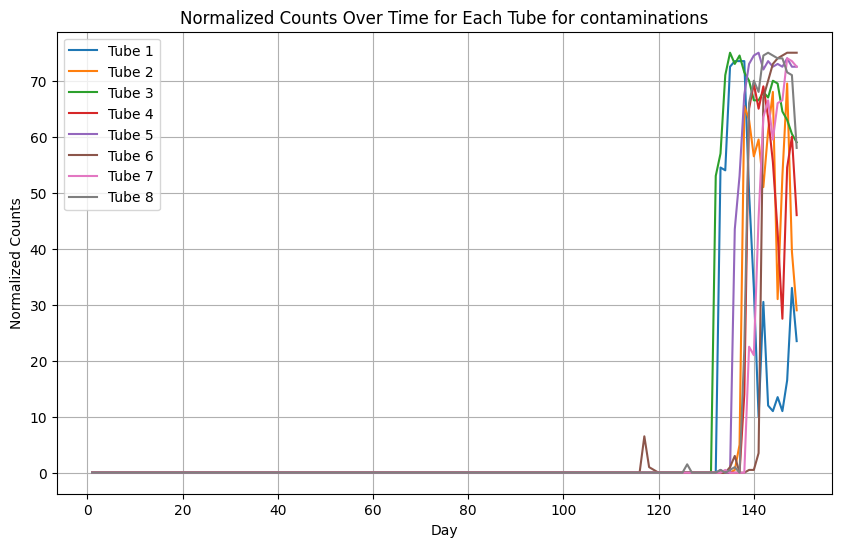

In [59]:
# for contam

tube_data_contam = {}
for tube_num in range(1, 9):  
    tube_data_contam[tube_num] = subset_contam[subset_contam['tube'] == tube_num]

plt.figure(figsize=(10, 6))  
for tube_num, data in tube_data_contam.items():
    grouped_data_contam = data.groupby('day')['normalized_counts'].mean()  # Group by day and calculate mean
    plt.plot(grouped_data_contam.index, grouped_data_contam.values, label=f'Tube {tube_num}')

plt.xlabel('Day')
plt.ylabel('Normalized Counts')
plt.title('Normalized Counts Over Time for Each Tube for contaminations')
plt.legend()
plt.grid(True)
plt.show()

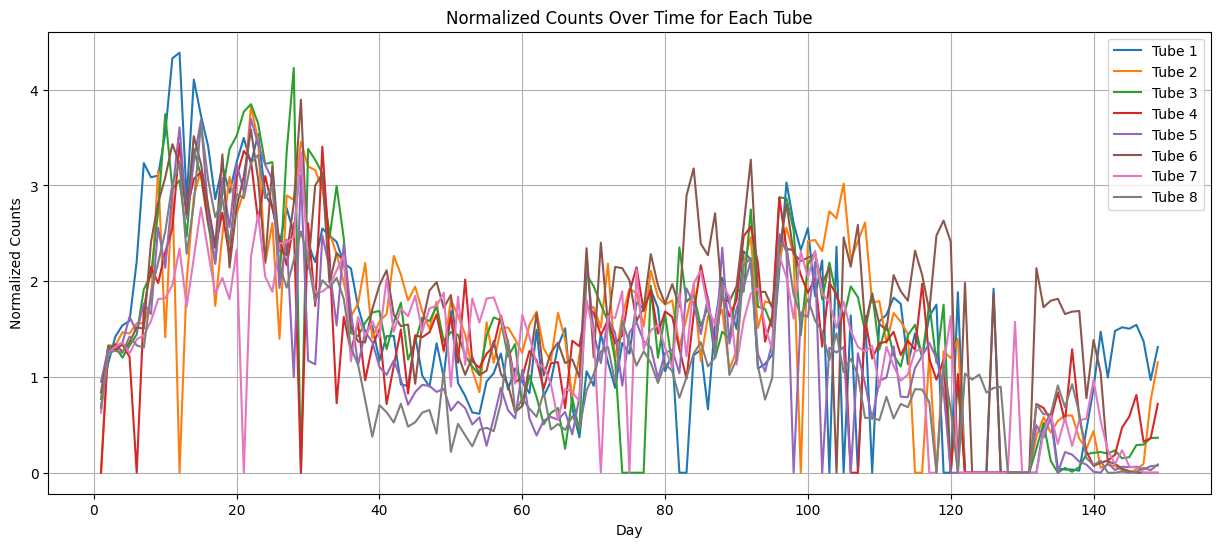

In [60]:
# for no contam

tube_data_no_contam = {}
for tube_num in range(1, 9):  
    tube_data_no_contam[tube_num] = subset_no_contam[subset_no_contam['tube'] == tube_num]

plt.figure(figsize=(15, 6))  
for tube_num, data in tube_data_no_contam.items():
    grouped_data_no_contam = data.groupby('day')['normalized_counts'].mean()  # Group by day and calculate mean
    plt.plot(grouped_data_no_contam.index, grouped_data_no_contam.values, label=f'Tube {tube_num}')

plt.xlabel('Day')
plt.ylabel('Normalized Counts')
plt.title('Normalized Counts Over Time for Each Tube')
plt.legend()
plt.grid(True)
plt.show()

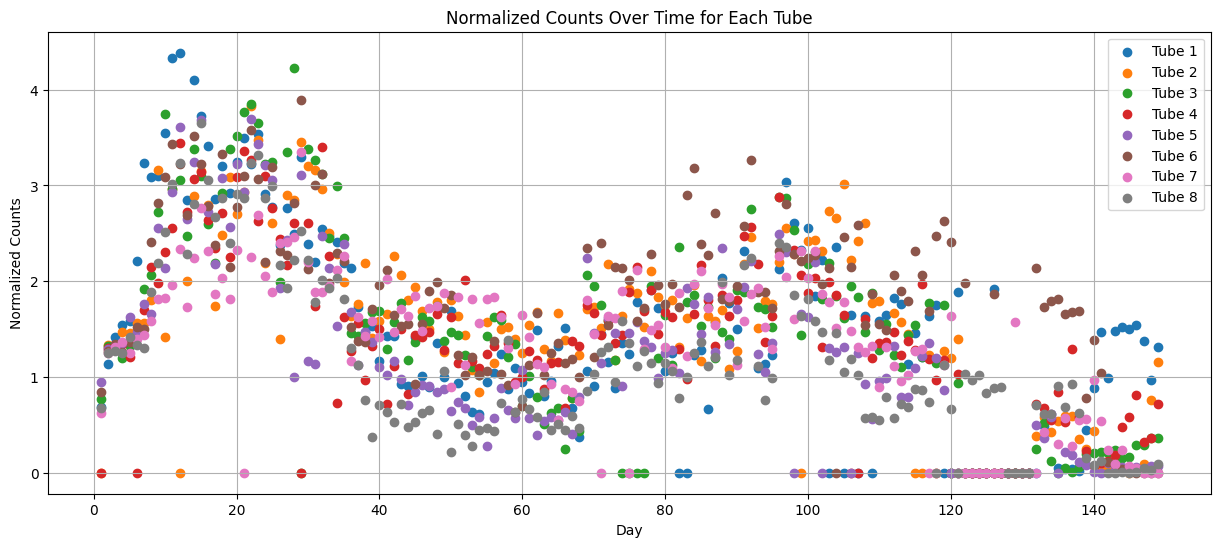

In [61]:

# Assuming tube numbers range from 1 to 6
tube_data_no_contam = {}
for tube_num in range(1, 9):
    tube_data_no_contam[tube_num] = subset_no_contam[subset_no_contam['tube'] == tube_num]

plt.figure(figsize=(15, 6))  
for tube_num, data in tube_data_no_contam.items():
    grouped_data_no_contam = data.groupby('day')['normalized_counts'].mean()  # Group by day and calculate mean
    plt.scatter(grouped_data_no_contam.index, grouped_data_no_contam.values, label=f'Tube {tube_num}')

plt.xlabel('Day')
plt.ylabel('Normalized Counts')
plt.title('Normalized Counts Over Time for Each Tube')
plt.legend()
plt.grid(True)
plt.show()


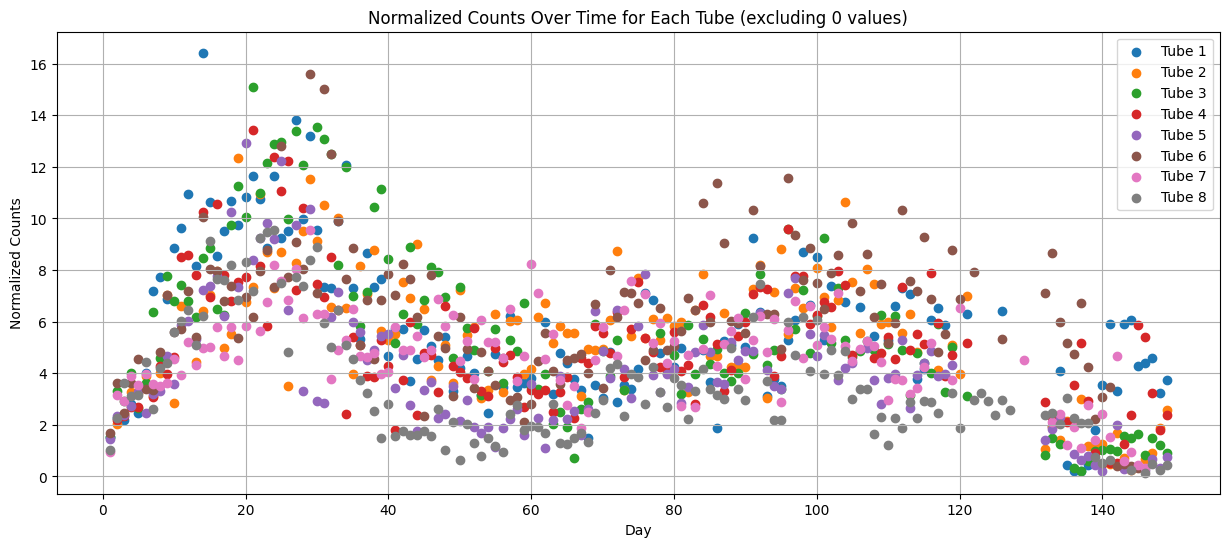

In [62]:
# eliminate every value thats 0


tube_data_no_contam = {}
for tube_num in range(1, 9):
    tube_data_no_contam[tube_num] = subset_no_contam[(subset_no_contam['tube'] == tube_num) & (subset_no_contam['normalized_counts'] != 0)]

plt.figure(figsize=(15, 6))  
for tube_num, data in tube_data_no_contam.items():
    grouped_data_no_contam = data.groupby('day')['normalized_counts'].mean()  # Group by day and calculate mean
    plt.scatter(grouped_data_no_contam.index, grouped_data_no_contam.values, label=f'Tube {tube_num}')

plt.xlabel('Day')
plt.ylabel('Normalized Counts')
plt.title('Normalized Counts Over Time for Each Tube (excluding 0 values)')
plt.legend()
plt.grid(True)
plt.show()


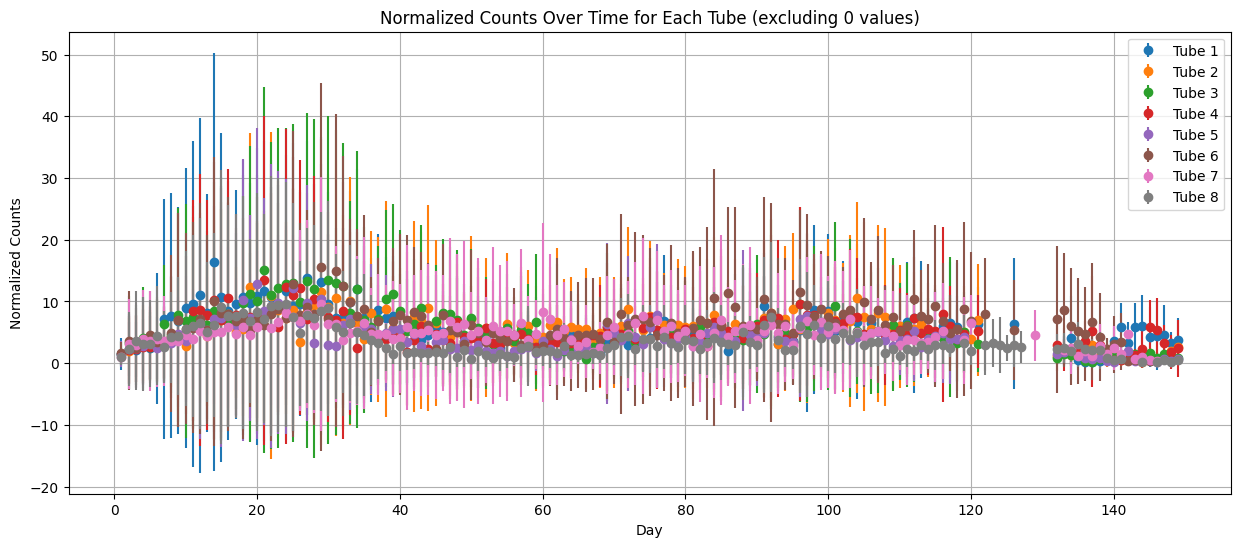

In [63]:


tube_data_no_contam = {}
for tube_num in range(1, 9):
    tube_data_no_contam[tube_num] = subset_no_contam[(subset_no_contam['tube'] == tube_num) & (subset_no_contam['normalized_counts'] != 0)]

plt.figure(figsize=(15, 6))  
for tube_num, data in tube_data_no_contam.items():
    grouped_data_no_contam = data.groupby('day')['normalized_counts']
    means = grouped_data_no_contam.mean()  # Group by day and calculate mean
    std_devs = grouped_data_no_contam.std()  # Standard deviation
    plt.errorbar(means.index, means.values, yerr=std_devs.values, fmt='o', label=f'Tube {tube_num}')

plt.xlabel('Day')
plt.ylabel('Normalized Counts')
plt.title('Normalized Counts Over Time for Each Tube (excluding 0 values)')
plt.legend()
plt.grid(True)
plt.show()


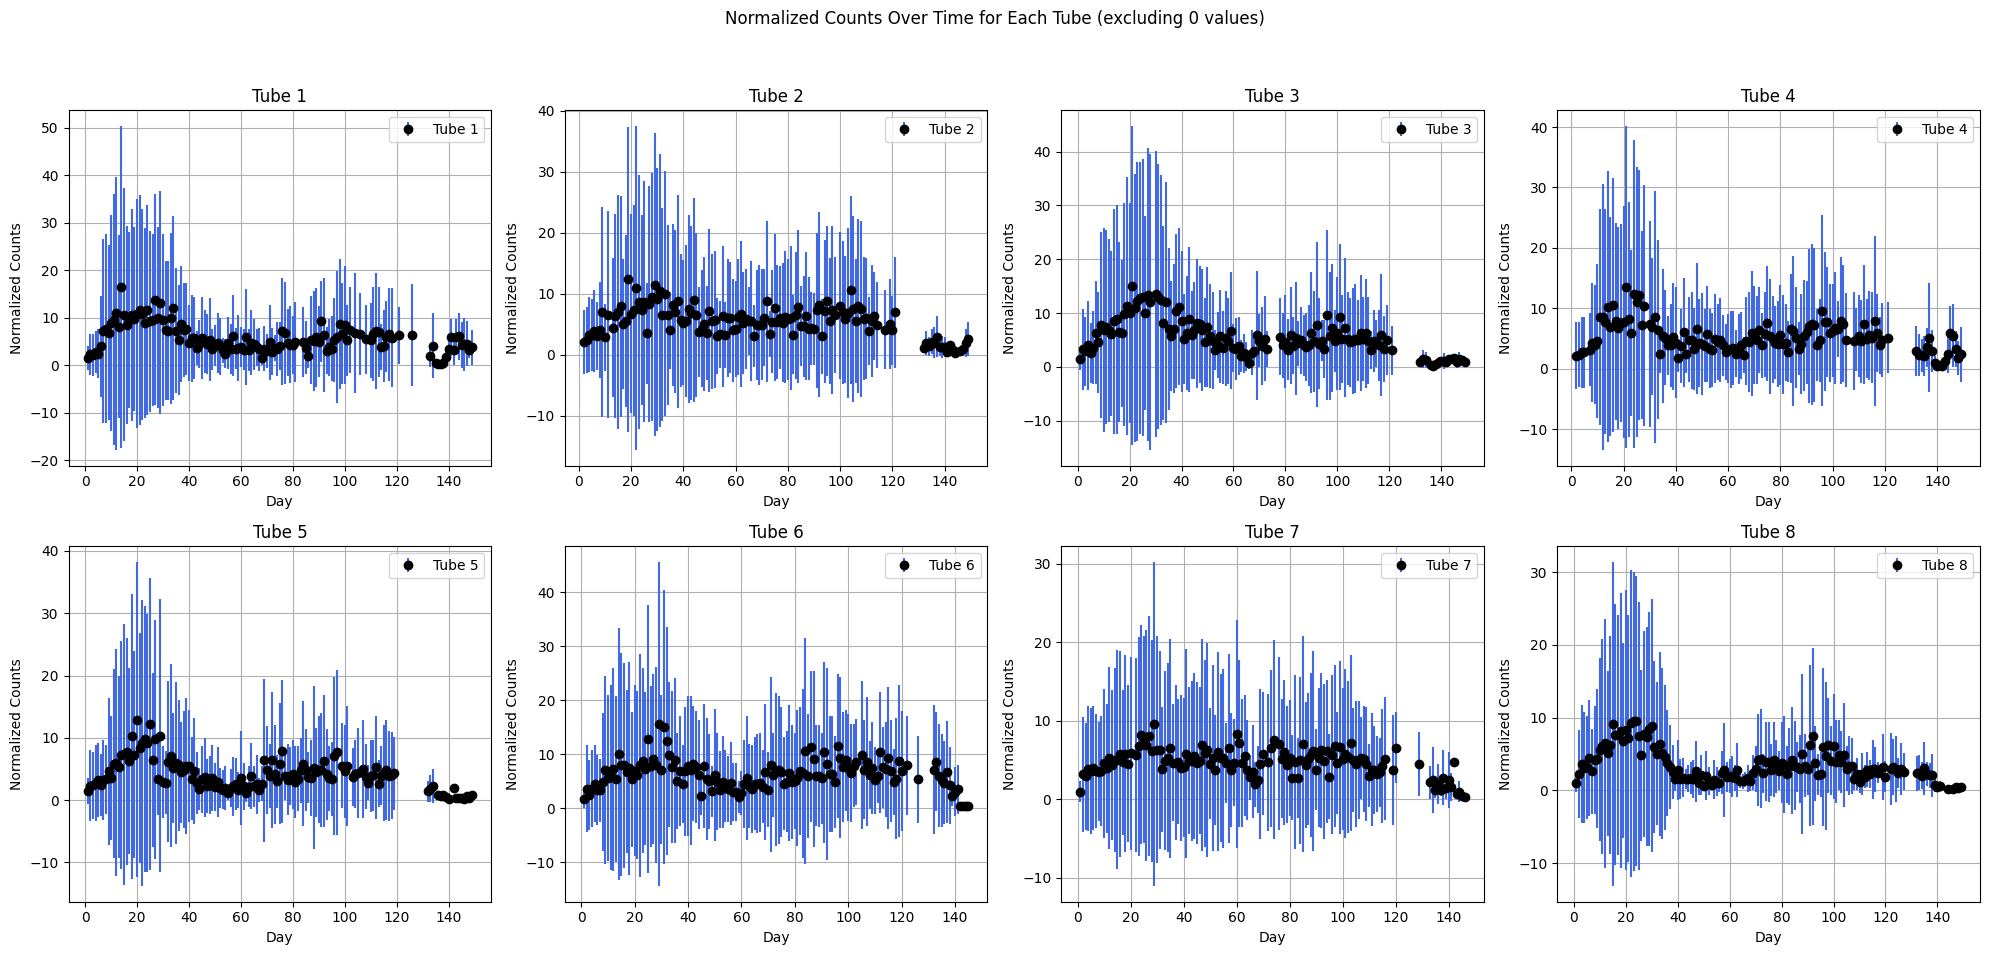

In [64]:

tube_data_no_contam = {}
for tube_num in range(1, 9):
    tube_data_no_contam[tube_num] = subset_no_contam[(subset_no_contam['tube'] == tube_num) & (subset_no_contam['normalized_counts'] != 0)]

fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # Adjust the grid size (2 rows, 4 columns) as needed

for tube_num, data in tube_data_no_contam.items():
    grouped_data_no_contam = data.groupby('day')['normalized_counts']
    means = grouped_data_no_contam.mean()  # Group by day and calculate mean
    std_devs = grouped_data_no_contam.std()  # Standard deviation
    
    ax = axs[(tube_num-1) // 4, (tube_num-1) % 4]  # Determine subplot location
    # Plot the error bars with blue color and points with orange color
    ax.errorbar(means.index, means.values, yerr=std_devs.values, fmt='o', ecolor='royalblue', mfc='black', mec='black', label=f'Tube {tube_num}')
    ax.set_xlabel('Day')
    ax.set_ylabel('Normalized Counts')
    ax.set_title(f'Tube {tube_num}')
    ax.legend()
    ax.grid(True)

plt.suptitle('Normalized Counts Over Time for Each Tube (excluding 0 values)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()


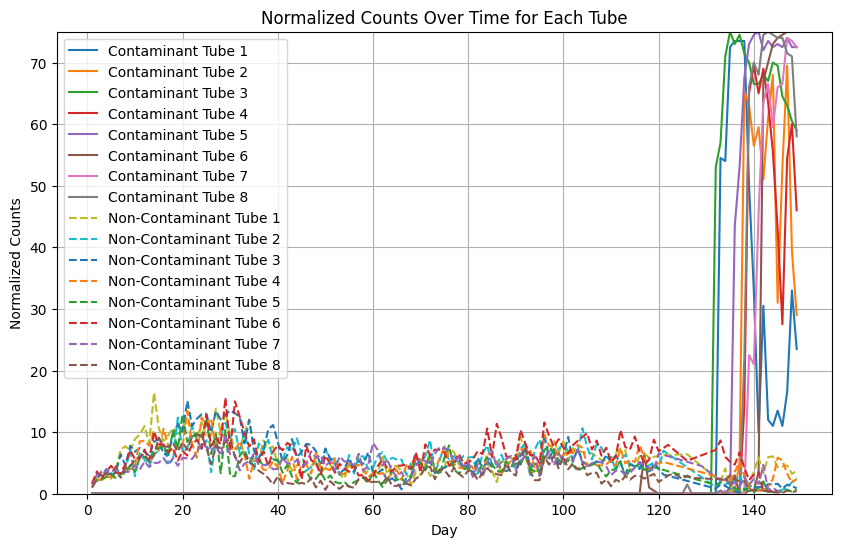

In [65]:

# Calculate y-axis limits based on the average of the days for contaminated data
contam_mean = []
for tube_num, data in tube_data_contam.items():
    contam_mean.extend(data.groupby('day')['normalized_counts'].mean().values)

y_max_contam = max(contam_mean)

# Calculate y-axis limits based on the average of the days for non-contaminated data
no_contam_mean = []
for tube_num, data in tube_data_no_contam.items():
    no_contam_mean.extend(data.groupby('day')['normalized_counts'].mean().values)

y_max_no_contam = max(no_contam_mean)

# Determine the overall maximum y-axis limit
y_max = max(y_max_contam, y_max_no_contam)

# Plot both datasets
plt.figure(figsize=(10, 6))  
for tube_num, data in tube_data_contam.items():
    grouped_data_contam = data.groupby('day')['normalized_counts'].mean()  # Group by day and calculate mean
    plt.plot(grouped_data_contam.index, grouped_data_contam.values, label=f'Contaminant Tube {tube_num}')

for tube_num, data in tube_data_no_contam.items():
    grouped_data_no_contam = data.groupby('day')['normalized_counts'].mean()  # Group by day and calculate mean
    plt.plot(grouped_data_no_contam.index, grouped_data_no_contam.values, label=f'Non-Contaminant Tube {tube_num}', linestyle='--')

plt.xlabel('Day')
plt.ylabel('Normalized Counts')
plt.title('Normalized Counts Over Time for Each Tube')
plt.legend()
plt.grid(True)
plt.ylim(0, y_max)  # Set y-axis limits
plt.show()


In [66]:
# Filter the DataFrame to include rows up to day 110
data_filtered = subset_no_contam[subset_no_contam['day'] <= 110]
print(data_filtered)

       day  tube         ID  counts  16S_copies  normalized_counts
0        1     1  Chlamy107     6.0           6           1.000000
1        1     1  Chlamy125    50.0           6           8.333333
2        1     1  Chlamy165     2.0           6           0.333333
3        1     1   Chlamy23     0.0           8           0.000000
4        1     1   Chlamy26     4.0          10           0.400000
...    ...   ...        ...     ...         ...                ...
19353  110     8   Chlamy74     0.0           3           0.000000
19354  110     8    Chlamy8     0.0           2           0.000000
19355  110     8    Chlamy6     1.0           3           0.333333
19356  110     8   Chlamy45    13.0           7           1.857143
19357  110     8   Chlamy77     0.0           7           0.000000

[17600 rows x 6 columns]


In [67]:
# average the tube replicates

result_df = data_filtered.groupby(['day', 'ID'])['normalized_counts'].mean().reset_index()

print(result_df)

      day         ID  normalized_counts
0       1  Chlamy107           0.479167
1       1  Chlamy123           0.000000
2       1  Chlamy125           4.541667
3       1  Chlamy165           0.125000
4       1   Chlamy19           0.166667
...   ...        ...                ...
2195  110   Chlamy75          15.875000
2196  110   Chlamy77           0.000000
2197  110    Chlamy8           0.000000
2198  110   Chlamy88           0.025000
2199  110   Chlamy90           0.000000

[2200 rows x 3 columns]


In [68]:
# Pivot the filtered DataFrame to have taxa as columns
pivoted_data = result_df.pivot(index='day', columns='ID', values='normalized_counts')

# Fill missing values with 0
#pivoted_data.fillna(0, inplace=True)

#print(pivoted_data)
print(pivoted_data)



ID   Chlamy107  Chlamy123  Chlamy125  Chlamy165  Chlamy19  Chlamy23  Chlamy24  \
day                                                                             
1     0.479167    0.00000   4.541667   0.125000  0.166667  0.140625  0.166667   
2     0.312500    0.12500  19.770833   0.812500  0.041667  0.000000  0.875000   
3     0.208333    0.06250  19.500000   0.875000  0.041667  0.000000  0.833333   
4     0.250000    0.12500  19.270833   0.583333  0.000000  0.000000  0.708333   
5     0.333333    0.21875  17.645833   0.312500  0.041667  0.000000  0.416667   
..         ...        ...        ...        ...       ...       ...       ...   
106   0.000000    0.06250   2.562500   0.354167  0.000000  0.000000  0.000000   
107   0.000000    0.03125   2.375000   0.437500  0.000000  0.000000  0.000000   
108   0.000000    0.03125   2.708333   0.479167  0.000000  0.015625  0.000000   
109   0.000000    0.06250   1.979167   0.187500  0.000000  0.000000  0.000000   
110   0.000000    0.03125   

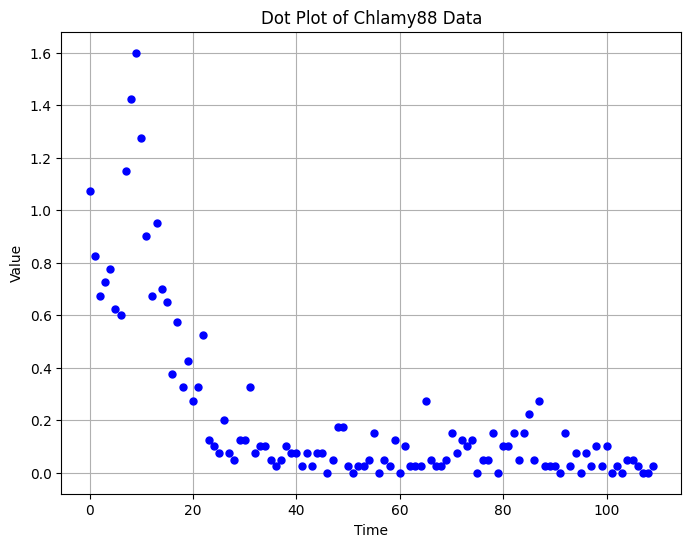

In [69]:
t = list(range(0, len(pivoted_data['Chlamy88'])))

# Extract the y-values
s = pivoted_data['Chlamy88'].values

# Create the dot plot
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
plt.plot(t, s, marker='o', linestyle='', markersize=5, color='b')  # 'o' specifies dots as markers
plt.grid(True)

# Labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Dot Plot of Chlamy88 Data')

# Show the plot
plt.show()

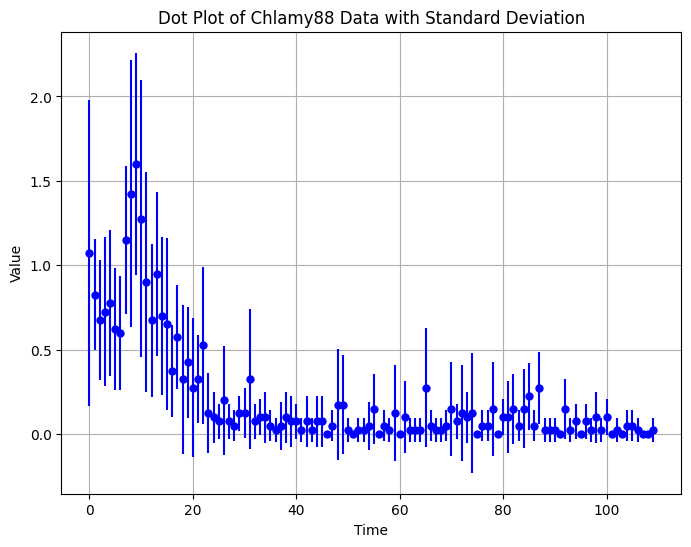

In [70]:

result_df = data_filtered.groupby(['day', 'ID'])['normalized_counts'].agg(['mean', 'std']).reset_index()


pivoted_data = result_df.pivot(index='day', columns='ID', values='mean')
std_data = result_df.pivot(index='day', columns='ID', values='std')

t = list(range(0, len(pivoted_data['Chlamy88'])))
s = pivoted_data['Chlamy88'].values
std = std_data['Chlamy88'].values


plt.figure(figsize=(8, 6))
plt.errorbar(t, s, yerr=std, fmt='o', color='b', markersize=5)
plt.grid(True)


plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Dot Plot of Chlamy88 Data with Standard Deviation')


plt.show()


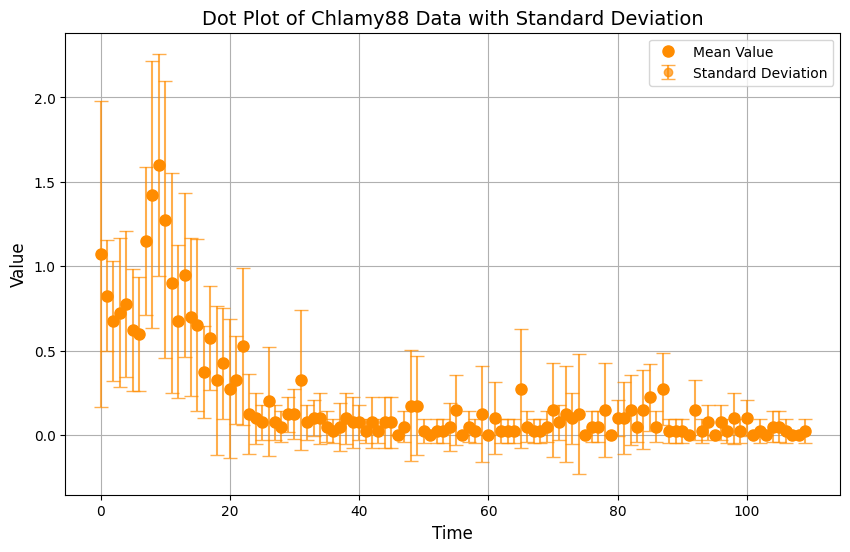

In [71]:


result_df = data_filtered.groupby(['day', 'ID'])['normalized_counts'].agg(['mean', 'std']).reset_index()


pivoted_data = result_df.pivot(index='day', columns='ID', values='mean')
std_data = result_df.pivot(index='day', columns='ID', values='std')

t = list(range(0, len(pivoted_data['Chlamy88'])))
s = pivoted_data['Chlamy88'].values
std = std_data['Chlamy88'].values


plt.figure(figsize=(10, 6))


plt.plot(t, s, marker='o', markersize=8, linestyle='', color='darkorange', label='Mean Value')


plt.errorbar(t, s, yerr=std, fmt='o', color='darkorange', alpha=0.7, capsize=5, label='Standard Deviation')

plt.grid(True)


plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Dot Plot of Chlamy88 Data with Standard Deviation', fontsize=14)


plt.legend()


plt.show()


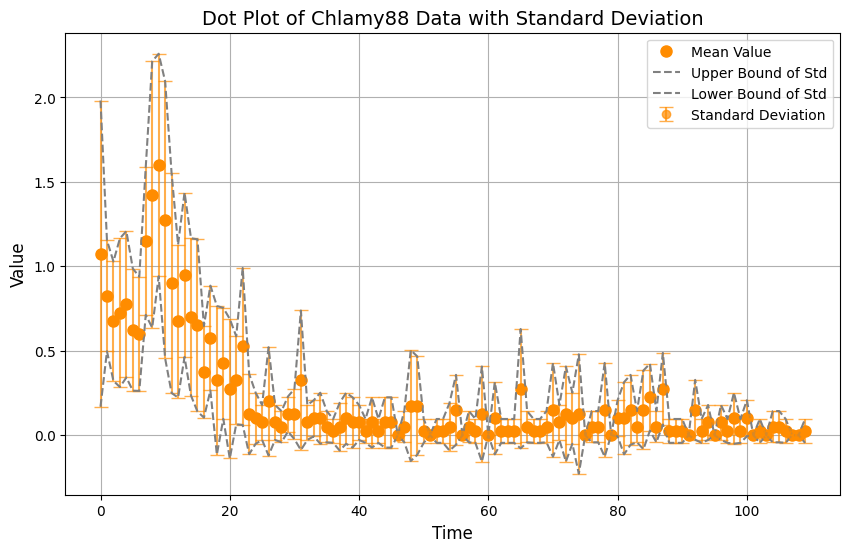

In [72]:


result_df = data_filtered.groupby(['day', 'ID'])['normalized_counts'].agg(['mean', 'std']).reset_index()


pivoted_data = result_df.pivot(index='day', columns='ID', values='mean')
std_data = result_df.pivot(index='day', columns='ID', values='std')

t = list(range(0, len(pivoted_data['Chlamy88'])))
s = pivoted_data['Chlamy88'].values
std = std_data['Chlamy88'].values


plt.figure(figsize=(10, 6))


plt.plot(t, s, marker='o', markersize=8, linestyle='', color='darkorange', label='Mean Value')


plt.errorbar(t, s, yerr=std, fmt='o', color='darkorange', alpha=0.7, capsize=5, label='Standard Deviation')


plt.plot(t, s + std, linestyle='--', color='gray', label='Upper Bound of Std')
plt.plot(t, s - std, linestyle='--', color='gray', label='Lower Bound of Std')

plt.grid(True)


plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Dot Plot of Chlamy88 Data with Standard Deviation', fontsize=14)


plt.legend()


plt.show()


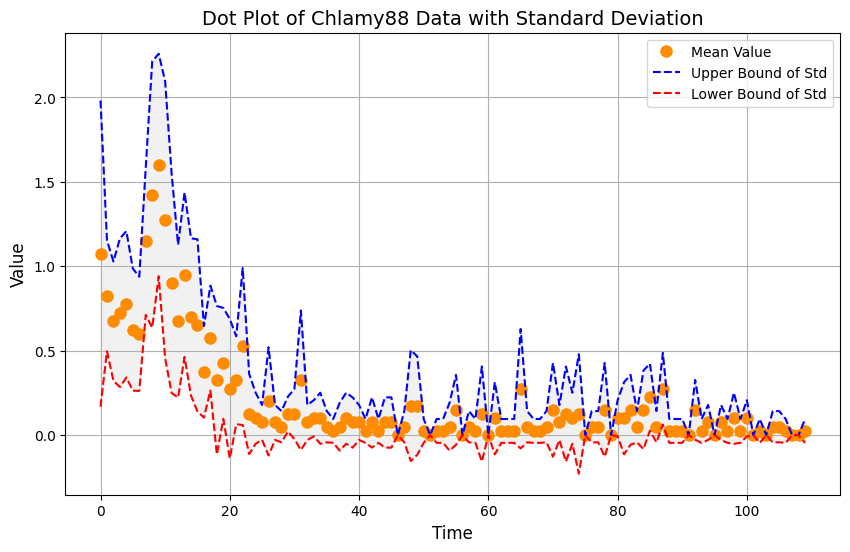

In [73]:

result_df = data_filtered.groupby(['day', 'ID'])['normalized_counts'].agg(['mean', 'std']).reset_index()


pivoted_data = result_df.pivot(index='day', columns='ID', values='mean')
std_data = result_df.pivot(index='day', columns='ID', values='std')


t = list(range(0, len(pivoted_data['Chlamy88'])))
s = pivoted_data['Chlamy88'].values
std = std_data['Chlamy88'].values


plt.figure(figsize=(10, 6))


plt.plot(t, s, marker='o', markersize=8, linestyle='', color='darkorange', label='Mean Value')


plt.plot(t, s + std, linestyle='--', color='blue', label='Upper Bound of Std')
plt.plot(t, s - std, linestyle='--', color='red', label='Lower Bound of Std')


plt.fill_between(t, s + std, s - std, color='lightgray', alpha=0.3)

plt.grid(True)


plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Dot Plot of Chlamy88 Data with Standard Deviation', fontsize=14)


plt.legend()


plt.show()


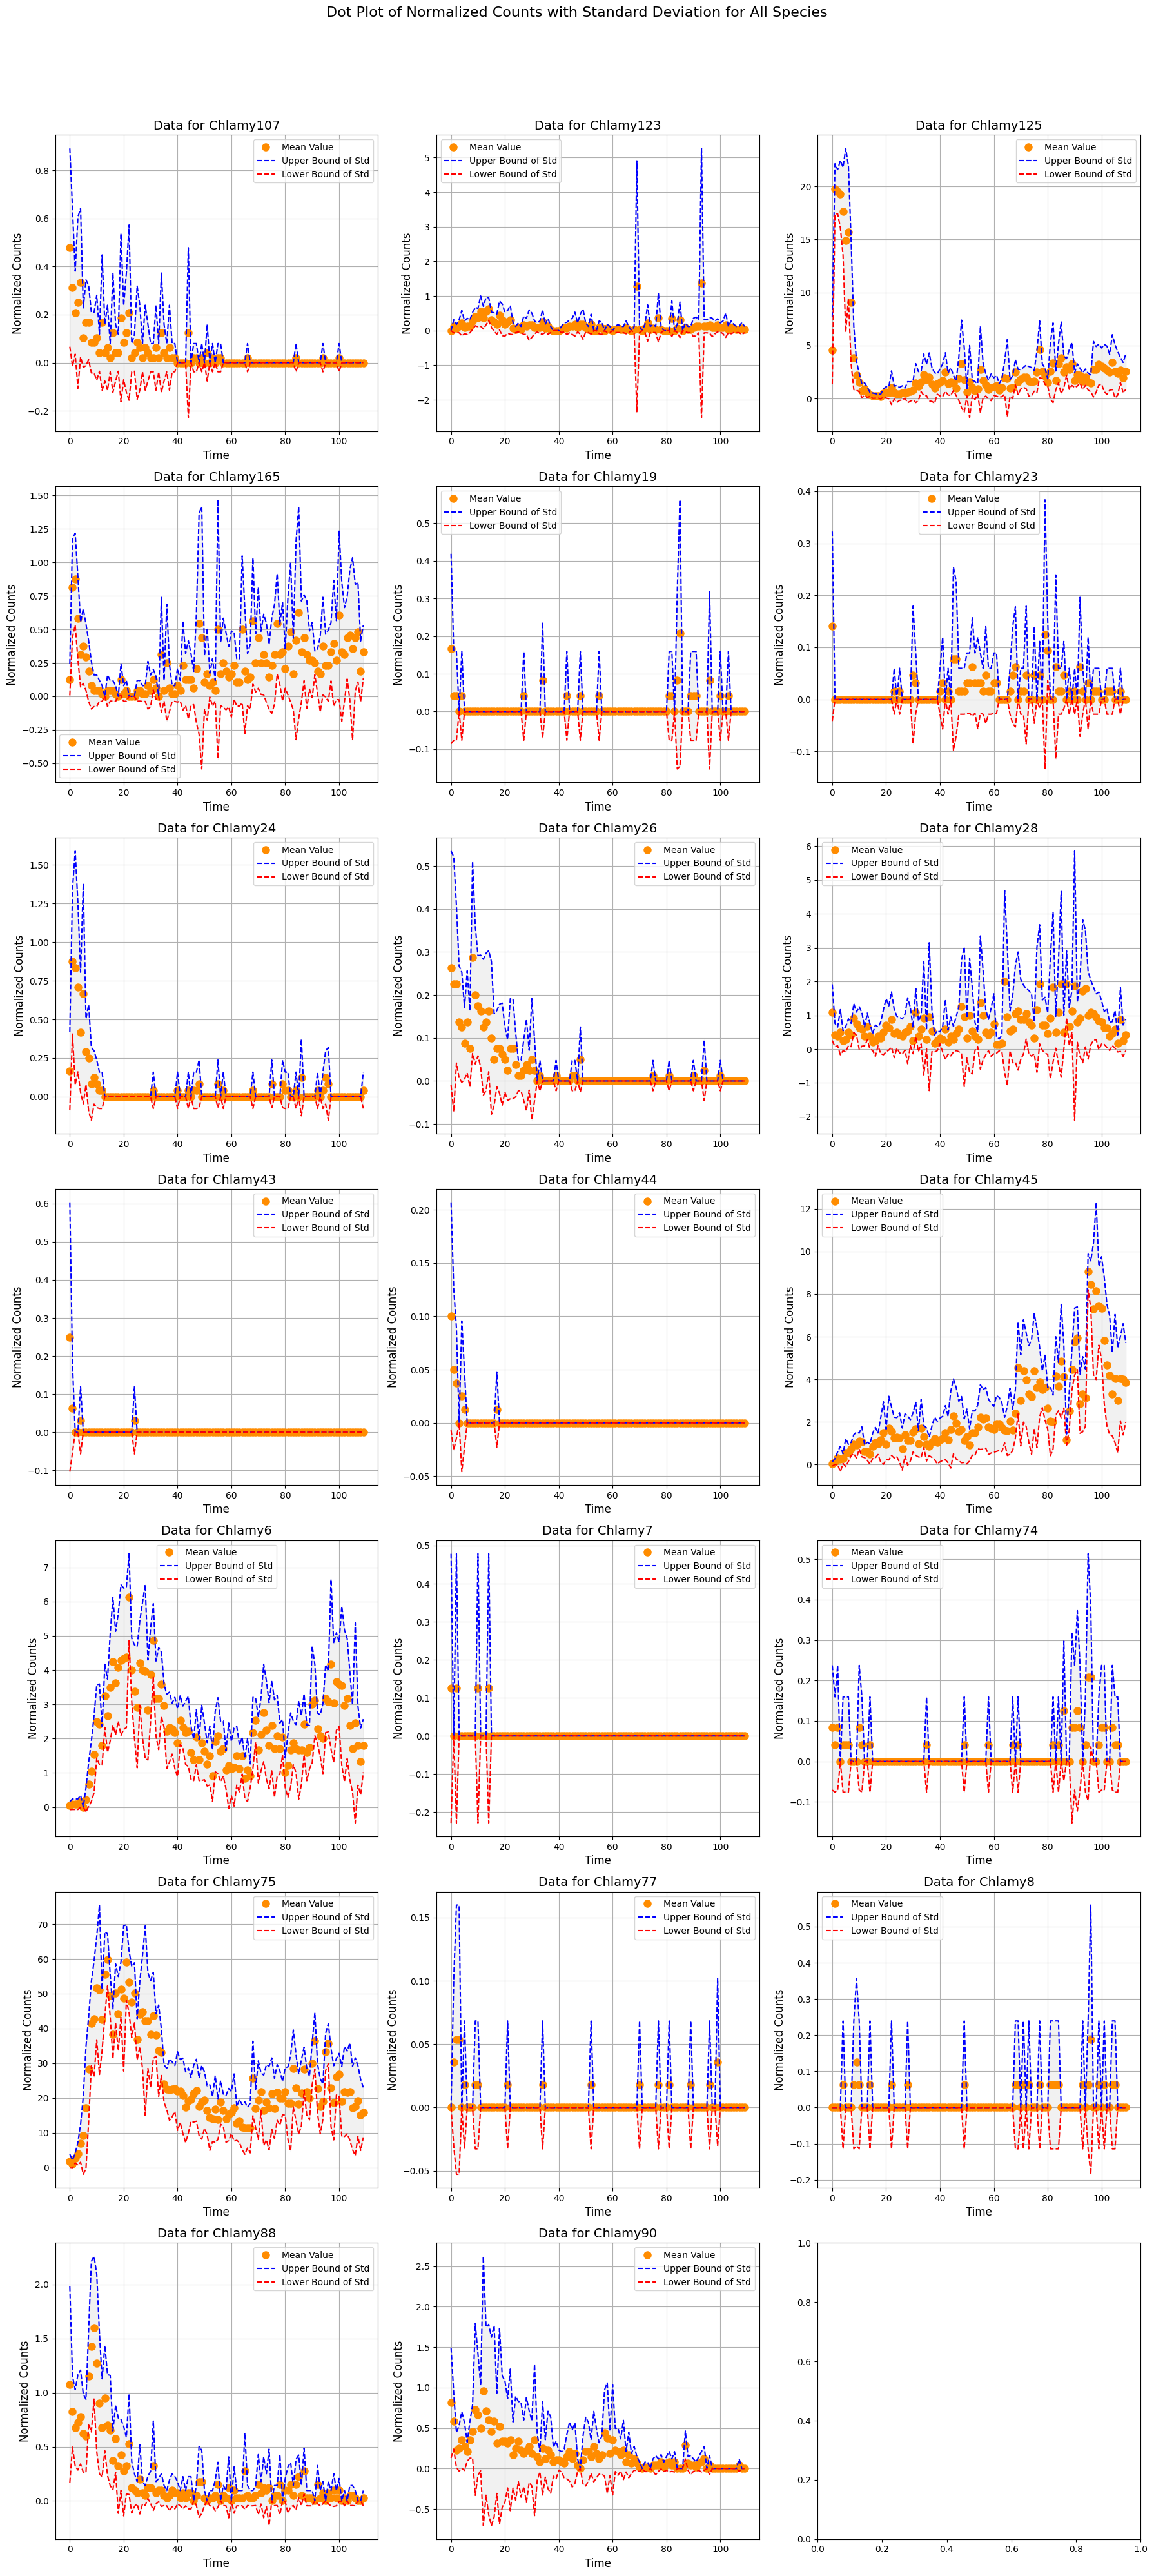

In [74]:

# group, middle, sd
result_df = data_filtered.groupby(['day', 'ID'])['normalized_counts'].agg(['mean', 'std']).reset_index()

# transform for visualisation
pivoted_data = result_df.pivot(index='day', columns='ID', values='mean')
std_data = result_df.pivot(index='day', columns='ID', values='std')

# amount of species
species_list = pivoted_data.columns
num_species = len(species_list)

# create grid layout
rows = (num_species + 2) // 3
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(18, 6*rows))  # grid size
axs = axs.flatten()  # transform to flat list -> easier accessible

for i, species in enumerate(species_list):
    t = list(range(len(pivoted_data[species])))
    s = pivoted_data[species].values
    std = std_data[species].values

    # plot points
    axs[i].plot(t, s, marker='o', markersize=8, linestyle='', color='darkorange', label='Mean Value')
    
    # upper, lower bund of sd
    axs[i].plot(t, s + std, linestyle='--', color='blue', label='Upper Bound of Std')
    axs[i].plot(t, s - std, linestyle='--', color='red', label='Lower Bound of Std')
    
    # interspaces in gray
    axs[i].fill_between(t, s + std, s - std, color='lightgray', alpha=0.3)
    
    axs[i].grid(True)
    
   
    axs[i].set_xlabel('Time', fontsize=12)
    axs[i].set_ylabel('Normalized Counts', fontsize=12)
    axs[i].set_title(f'Data for {species}', fontsize=14)
    axs[i].legend()


plt.suptitle('Dot Plot of Normalized Counts with Standard Deviation for All Species', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


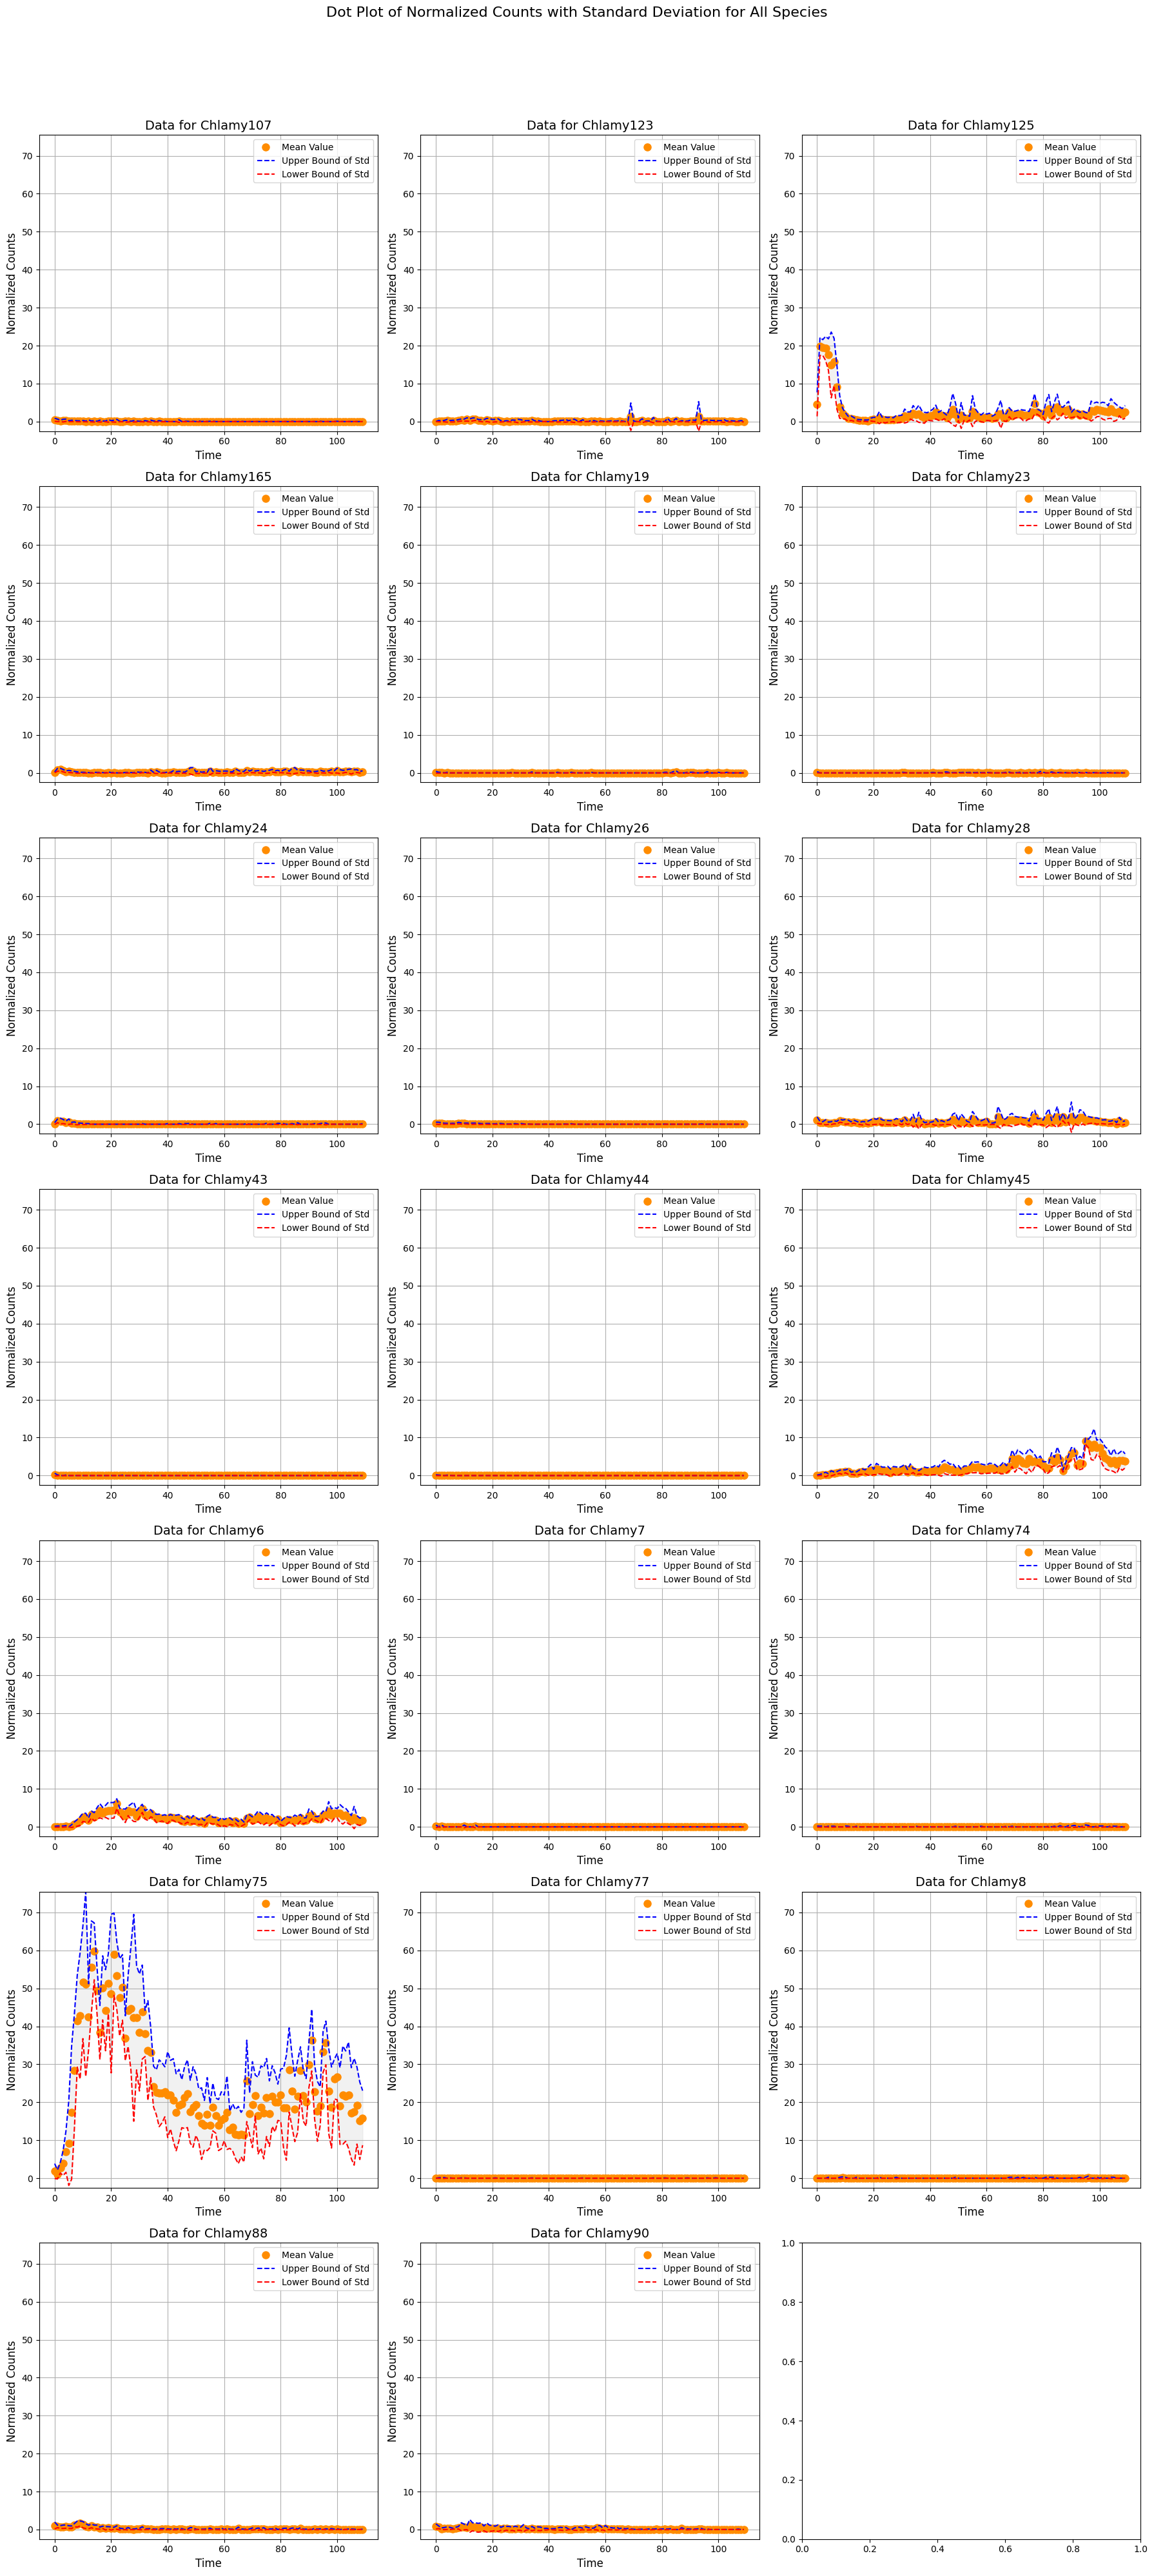

In [75]:

# group, middle, sd
result_df = data_filtered.groupby(['day', 'ID'])['normalized_counts'].agg(['mean', 'std']).reset_index()

# transform for visualisation
pivoted_data = result_df.pivot(index='day', columns='ID', values='mean')
std_data = result_df.pivot(index='day', columns='ID', values='std')

# amount of species
species_list = pivoted_data.columns
num_species = len(species_list)

# create grid layout
rows = (num_species + 2) // 3
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(18, 6*rows))  # grid size
axs = axs.flatten()  # transform to flat list -> easier accessible

# Find global min and max values for y-axis scaling
y_min = float('inf')
y_max = float('-inf')

for species in species_list:
    s = pivoted_data[species].values
    std = std_data[species].values
    y_min = min(y_min, (s - std).min())
    y_max = max(y_max, (s + std).max())

# Plotting with consistent y-axis scaling
for i, species in enumerate(species_list):
    t = list(range(len(pivoted_data[species])))
    s = pivoted_data[species].values
    std = std_data[species].values

    # plot points
    axs[i].plot(t, s, marker='o', markersize=8, linestyle='', color='darkorange', label='Mean Value')
    
    # upper, lower bund of sd
    axs[i].plot(t, s + std, linestyle='--', color='blue', label='Upper Bound of Std')
    axs[i].plot(t, s - std, linestyle='--', color='red', label='Lower Bound of Std')
    
    # interspaces in gray
    axs[i].fill_between(t, s + std, s - std, color='lightgray', alpha=0.3)
    
    axs[i].grid(True)
    
    axs[i].set_xlabel('Time', fontsize=12)
    axs[i].set_ylabel('Normalized Counts', fontsize=12)
    axs[i].set_title(f'Data for {species}', fontsize=14)
    axs[i].legend()
    
    # Set consistent y-axis limits
    axs[i].set_ylim(y_min, y_max)

# Adjust layout and add main title
plt.suptitle('Dot Plot of Normalized Counts with Standard Deviation for All Species', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Platz für den Haupttitel lassen
plt.show()


In [76]:
# export data
pivoted_data.to_csv('pivoted_output.txt', sep='\t', index=False)


In [77]:
print(pivoted_data)

ID   Chlamy107  Chlamy123  Chlamy125  Chlamy165  Chlamy19  Chlamy23  Chlamy24  \
day                                                                             
1     0.479167    0.00000   4.541667   0.125000  0.166667  0.140625  0.166667   
2     0.312500    0.12500  19.770833   0.812500  0.041667  0.000000  0.875000   
3     0.208333    0.06250  19.500000   0.875000  0.041667  0.000000  0.833333   
4     0.250000    0.12500  19.270833   0.583333  0.000000  0.000000  0.708333   
5     0.333333    0.21875  17.645833   0.312500  0.041667  0.000000  0.416667   
..         ...        ...        ...        ...       ...       ...       ...   
106   0.000000    0.06250   2.562500   0.354167  0.000000  0.000000  0.000000   
107   0.000000    0.03125   2.375000   0.437500  0.000000  0.000000  0.000000   
108   0.000000    0.03125   2.708333   0.479167  0.000000  0.015625  0.000000   
109   0.000000    0.06250   1.979167   0.187500  0.000000  0.000000  0.000000   
110   0.000000    0.03125   

In [78]:
# create cooccurrance matrix

co_occurrence_matrix = pivoted_data.corr(method='pearson')

print(co_occurrence_matrix)

ID         Chlamy107  Chlamy123  Chlamy125  Chlamy165  Chlamy19  Chlamy23  \
ID                                                                          
Chlamy107   1.000000   0.079968   0.588676   0.032943  0.304678  0.008839   
Chlamy123   0.079968   1.000000  -0.051274  -0.122659 -0.005615 -0.197001   
Chlamy125   0.588676  -0.051274   1.000000   0.576804  0.183177 -0.112447   
Chlamy165   0.032943  -0.122659   0.576804   1.000000  0.329019  0.008668   
Chlamy19    0.304678  -0.005615   0.183177   0.329019  1.000000  0.139359   
Chlamy23    0.008839  -0.197001  -0.112447   0.008668  0.139359  1.000000   
Chlamy24    0.615574  -0.038442   0.926063   0.472749  0.139465 -0.058709   
Chlamy26    0.719314   0.254897   0.481564  -0.025320  0.162673 -0.070754   
Chlamy28   -0.153775   0.240268  -0.039320   0.430804  0.337209  0.034106   
Chlamy43    0.638820  -0.069766   0.184762   0.014724  0.498594  0.412266   
Chlamy44    0.730996  -0.065802   0.449166   0.195942  0.487796  0.312863   

In [79]:
# set threshold

threshold = 0

# Apply thresholding
co_occurrence_matrix[abs(co_occurrence_matrix) < threshold] = 0

print(co_occurrence_matrix)


co_occ_directed = co_occurrence_matrix

ID         Chlamy107  Chlamy123  Chlamy125  Chlamy165  Chlamy19  Chlamy23  \
ID                                                                          
Chlamy107   1.000000   0.079968   0.588676   0.032943  0.304678  0.008839   
Chlamy123   0.079968   1.000000  -0.051274  -0.122659 -0.005615 -0.197001   
Chlamy125   0.588676  -0.051274   1.000000   0.576804  0.183177 -0.112447   
Chlamy165   0.032943  -0.122659   0.576804   1.000000  0.329019  0.008668   
Chlamy19    0.304678  -0.005615   0.183177   0.329019  1.000000  0.139359   
Chlamy23    0.008839  -0.197001  -0.112447   0.008668  0.139359  1.000000   
Chlamy24    0.615574  -0.038442   0.926063   0.472749  0.139465 -0.058709   
Chlamy26    0.719314   0.254897   0.481564  -0.025320  0.162673 -0.070754   
Chlamy28   -0.153775   0.240268  -0.039320   0.430804  0.337209  0.034106   
Chlamy43    0.638820  -0.069766   0.184762   0.014724  0.498594  0.412266   
Chlamy44    0.730996  -0.065802   0.449166   0.195942  0.487796  0.312863   

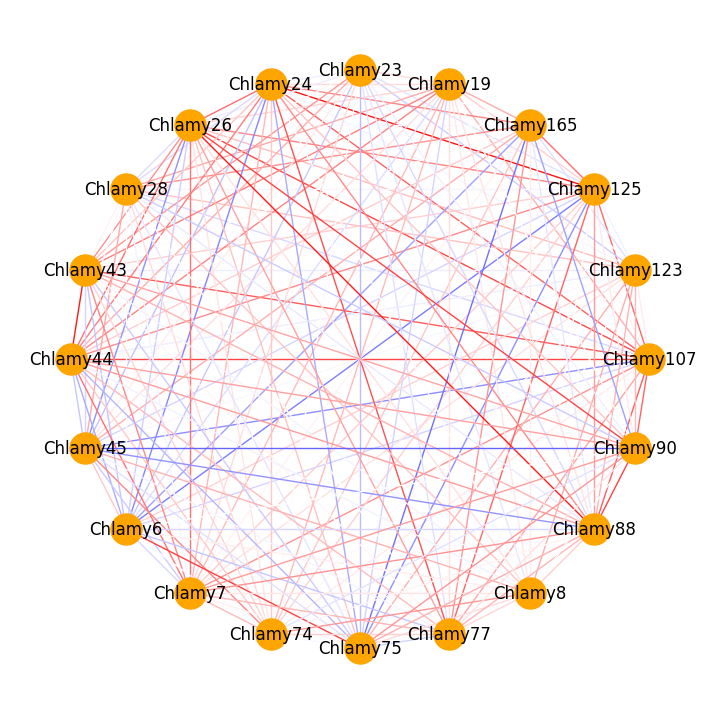

In [80]:
import networkx as nx

# Construct the co-occurrence network
G = nx.Graph()  # Create an empty undirected graph

# Add nodes (taxa) to the graph
G.add_nodes_from(co_occurrence_matrix.columns)

# Add edges (co-occurrence relationships) to the graph
for i, row in co_occurrence_matrix.iterrows():
    for j, value in row.items():
        if abs(value) > threshold and i != j:  # Check if the co-occurrence score is above the threshold and not self-edge
            G.add_edge(i, j, weight=value)


edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

# Define colors for edges
edge_colors = []

for weight in weights:
    if weight == 1:
        edge_colors.append('red')
    elif weight == -1:
        edge_colors.append('blue')
    elif weight == 0:
        edge_colors.append('white')
    else:
        if weight > 0:
            intensity = 1 - np.abs(weight)
            edge_colors.append((1, intensity, intensity))  # gradient from red to white
            
        else:
            intensity = 1 - np.abs(weight)
            edge_colors.append((intensity, intensity, 1))  # gradient from blue to white

# Draw the graph

plt.figure(figsize=(7, 7))

nx.draw(G, pos=nx.circular_layout(G), edge_color=edge_colors, with_labels=True, node_size=500, node_color="orange")

plt.show()

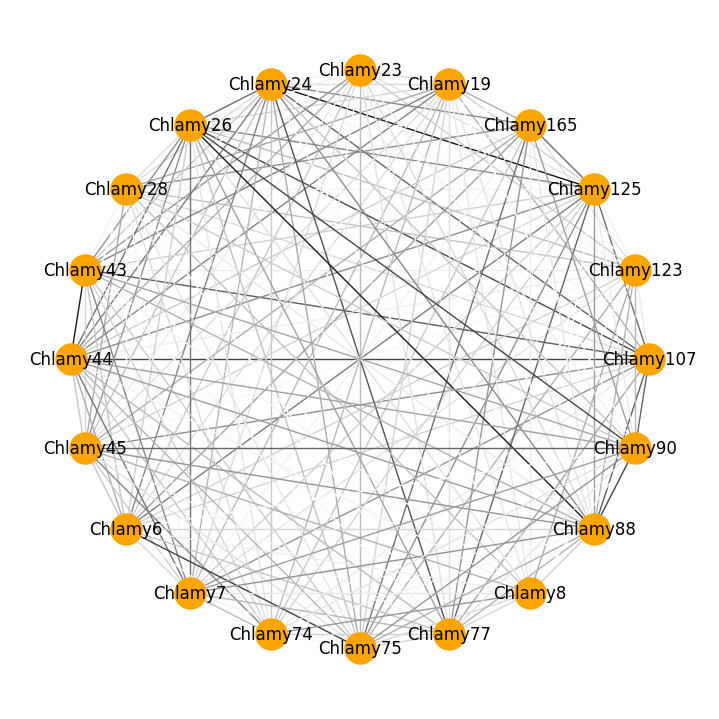

In [81]:

# Construct the co-occurrence network
G = nx.Graph()  # Create an empty undirected graph

# Add nodes (taxa) to the graph
G.add_nodes_from(co_occurrence_matrix.columns)

# Add edges (co-occurrence relationships) to the graph
for i, row in co_occurrence_matrix.iterrows():
    for j, value in row.items():
        if abs(value) > threshold and i != j:  # Check if the co-occurrence score is above the threshold and not self-edge
            G.add_edge(i, j, weight=value)


edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

# Define colors for edges
edge_colors = []

for weight in weights:
    if weight == 0:
        edge_colors.append('white')
    else:
        intensity = 1 - abs(weight)
        edge_colors.append((intensity, intensity, intensity))  # gradient from black to white

plt.figure(figsize=(7, 7))
pos = nx.circular_layout(G)
nx.draw(G, pos, edge_color=edge_colors, with_labels=True, node_size=500, node_color="orange")
plt.show()


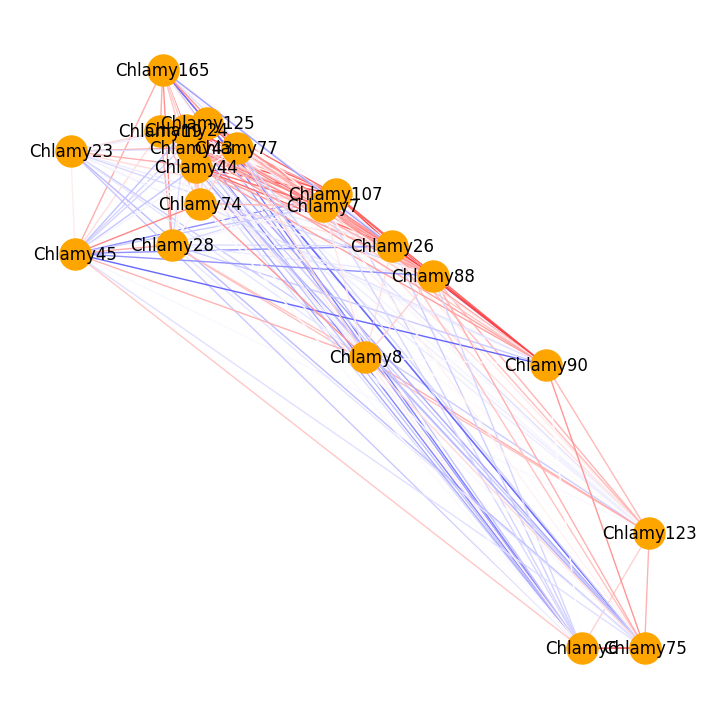

In [82]:

# Construct the co-occurrence network
G = nx.Graph()  # Create an empty undirected graph

# Add nodes (taxa) to the graph
G.add_nodes_from(co_occurrence_matrix.columns)

# Add edges (co-occurrence relationships) to the graph
for i, row in co_occurrence_matrix.iterrows():
    for j, value in row.items():
        if abs(value) > threshold and i != j:  # Check if the co-occurrence score is above the threshold and not self-edge
            G.add_edge(i, j, weight=value)


edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

# Define colors for edges
edge_colors = []

for weight in weights:
    if weight == 1:
        edge_colors.append('red')
    elif weight == -1:
        edge_colors.append('blue')
    elif weight == 0:
        edge_colors.append('white')
    else:
        if weight > 0:
            intensity = 1 - np.abs(weight)
            edge_colors.append((1, intensity, intensity))  # gradient from red to white
            
        else:
            intensity = 1 - np.abs(weight)
            edge_colors.append((intensity, intensity, 1))  # gradient from blue to white

# Draw the graph

plt.figure(figsize=(7, 7))

nx.draw(G, edge_color=edge_colors, with_labels=True, node_size=500, node_color="orange")

plt.show()

<Axes: xlabel='Chlamy26', ylabel='Chlamy88'>

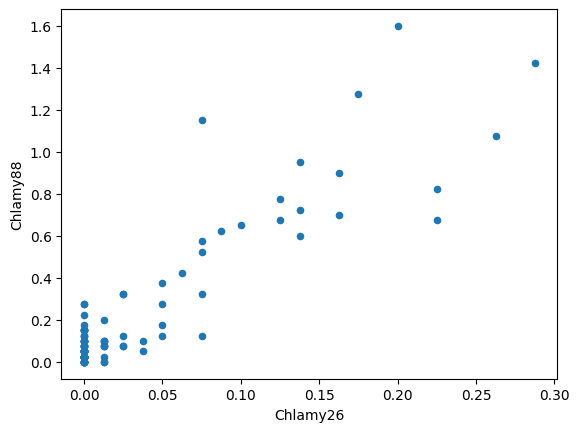

In [83]:
# plot co occurrences

bakti_1 = "Chlamy26"
bakti_2 = "Chlamy88"

pivoted_data.plot.scatter(x=bakti_1 ,y=bakti_2)

In [84]:
# calculate correlation coefficiant
correlation = pivoted_data[bakti_1].corr(pivoted_data[bakti_2], method="pearson")

print(correlation)

0.9034436584478843


Mutual information

In [85]:
#pip install scikit-learn

In [86]:
print(pivoted_data)

ID   Chlamy107  Chlamy123  Chlamy125  Chlamy165  Chlamy19  Chlamy23  Chlamy24  \
day                                                                             
1     0.479167    0.00000   4.541667   0.125000  0.166667  0.140625  0.166667   
2     0.312500    0.12500  19.770833   0.812500  0.041667  0.000000  0.875000   
3     0.208333    0.06250  19.500000   0.875000  0.041667  0.000000  0.833333   
4     0.250000    0.12500  19.270833   0.583333  0.000000  0.000000  0.708333   
5     0.333333    0.21875  17.645833   0.312500  0.041667  0.000000  0.416667   
..         ...        ...        ...        ...       ...       ...       ...   
106   0.000000    0.06250   2.562500   0.354167  0.000000  0.000000  0.000000   
107   0.000000    0.03125   2.375000   0.437500  0.000000  0.000000  0.000000   
108   0.000000    0.03125   2.708333   0.479167  0.000000  0.015625  0.000000   
109   0.000000    0.06250   1.979167   0.187500  0.000000  0.000000  0.000000   
110   0.000000    0.03125   

In [87]:

from sklearn.feature_selection import mutual_info_regression

# create function for later use
def compute_mutual_information(df):
    mutual_info = pd.DataFrame(index=df.columns, columns=df.columns)

    for col1 in df.columns:
        for col2 in df.columns:
            if col1 == col2:
                mutual_info.loc[col1, col2] = np.nan
            else:
                mi = mutual_info_regression(df[[col1]], df[col2])[0]
                mutual_info.loc[col1, col2] = mi

    return mutual_info

mutual_info_matrix = compute_mutual_information(pivoted_data)

print(mutual_info_matrix)

ID        Chlamy107 Chlamy123 Chlamy125 Chlamy165  Chlamy19  Chlamy23  \
ID                                                                      
Chlamy107       NaN         0  0.166667  0.299508  0.018907  0.139045   
Chlamy123         0       NaN  0.093516         0         0  0.029986   
Chlamy125  0.167575  0.069341       NaN  0.572555  0.051286  0.119407   
Chlamy165  0.255292         0  0.553321       NaN  0.073549  0.053223   
Chlamy19   0.038288         0  0.021863  0.118148       NaN  0.008668   
Chlamy23   0.124243  0.097222  0.137571  0.024881  0.036219       NaN   
Chlamy24   0.053927  0.027451  0.190346  0.018295  0.067099  0.010593   
Chlamy26   0.235118  0.147093  0.252661  0.122643         0  0.135945   
Chlamy28   0.024917         0  0.164208  0.120061         0  0.093653   
Chlamy43   0.030804         0  0.014533  0.029106         0  0.031758   
Chlamy44    0.09033  0.074284  0.053191         0  0.002201  0.039026   
Chlamy45   0.406313         0  0.390128   0.27989  

In [88]:
# check if max value is smaller 1

max_value = np.nanmax(mutual_info_matrix.values) # nanmax as there are nans

print(max_value)

0.5725551071607189


In [89]:
# set threshold

threshold = 0

# Apply thresholding
mutual_info_matrix[abs(mutual_info_matrix) < threshold] = 0

co_occurrence_matrix = mutual_info_matrix

print(co_occurrence_matrix)

ID        Chlamy107 Chlamy123 Chlamy125 Chlamy165  Chlamy19  Chlamy23  \
ID                                                                      
Chlamy107       NaN         0  0.166667  0.299508  0.018907  0.139045   
Chlamy123         0       NaN  0.093516         0         0  0.029986   
Chlamy125  0.167575  0.069341       NaN  0.572555  0.051286  0.119407   
Chlamy165  0.255292         0  0.553321       NaN  0.073549  0.053223   
Chlamy19   0.038288         0  0.021863  0.118148       NaN  0.008668   
Chlamy23   0.124243  0.097222  0.137571  0.024881  0.036219       NaN   
Chlamy24   0.053927  0.027451  0.190346  0.018295  0.067099  0.010593   
Chlamy26   0.235118  0.147093  0.252661  0.122643         0  0.135945   
Chlamy28   0.024917         0  0.164208  0.120061         0  0.093653   
Chlamy43   0.030804         0  0.014533  0.029106         0  0.031758   
Chlamy44    0.09033  0.074284  0.053191         0  0.002201  0.039026   
Chlamy45   0.406313         0  0.390128   0.27989  

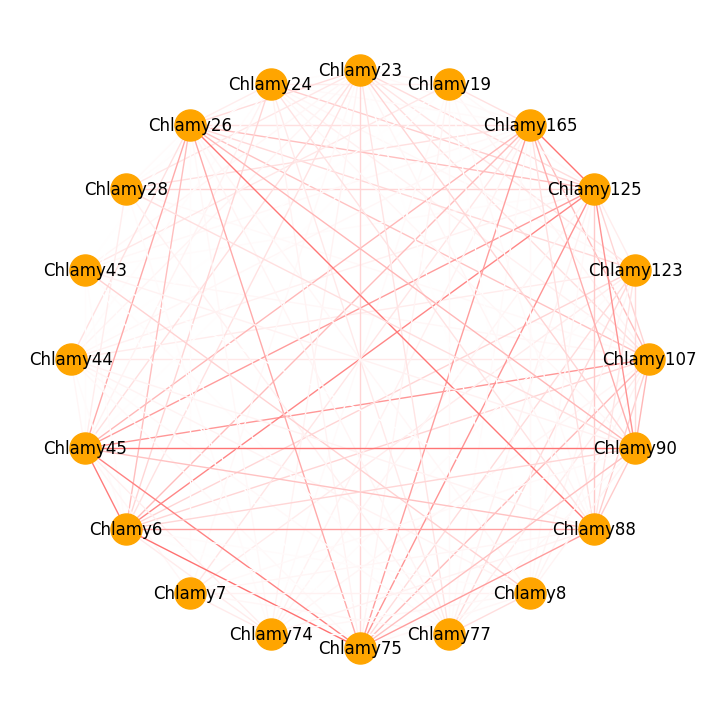

In [90]:

# Construct the co-occurrence network
G = nx.Graph()  # Create an empty undirected graph

# Add nodes
G.add_nodes_from(co_occurrence_matrix.columns)

# Add edges
for i, row in co_occurrence_matrix.iterrows():
    for j, value in row.items():
        if abs(value) > threshold and i != j:  # Check if the co-occurrence score is above the threshold and not self-edge
            G.add_edge(i, j, weight=value)


edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

# Define colors for edges
edge_colors = []

for weight in weights:
    if weight == 1:
        edge_colors.append('red')
    elif weight == -1:
        edge_colors.append('blue')
    elif weight == 0:
        edge_colors.append('white')
    else:
        if weight > 0:
            intensity = 1 - np.abs(weight)
            edge_colors.append((1, intensity, intensity))  # gradient from red to white
            
        else:
            intensity = 1 - np.abs(weight)
            edge_colors.append((intensity, intensity, 1))  # gradient from blue to white


plt.figure(figsize=(7, 7))

nx.draw(G, pos=nx.circular_layout(G), edge_color=edge_colors, with_labels=True, node_size=500, node_color="orange")

plt.show()

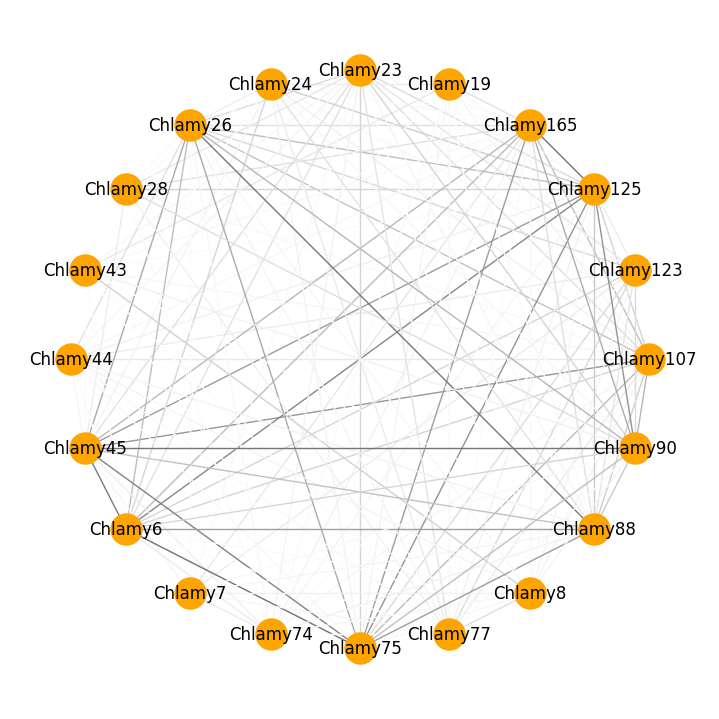

In [91]:

# Construct the co-occurrence network
G = nx.Graph()  # Create an empty undirected graph

# Add nodes
G.add_nodes_from(co_occurrence_matrix.columns)

# Add edges
for i, row in co_occurrence_matrix.iterrows():
    for j, value in row.items():
        if abs(value) > threshold and i != j:  # Check if the co-occurrence score is above the threshold and not self-edge
            G.add_edge(i, j, weight=value)


edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

# Define colors for edges
edge_colors = []

for weight in weights:
    if weight == 0:
        edge_colors.append('white')
    else:
        intensity = 1 - abs(weight)
        edge_colors.append((intensity, intensity, intensity))  # gradient from black to white

plt.figure(figsize=(7, 7))
pos = nx.circular_layout(G)
nx.draw(G, pos, edge_color=edge_colors, with_labels=True, node_size=500, node_color="orange")
plt.show()


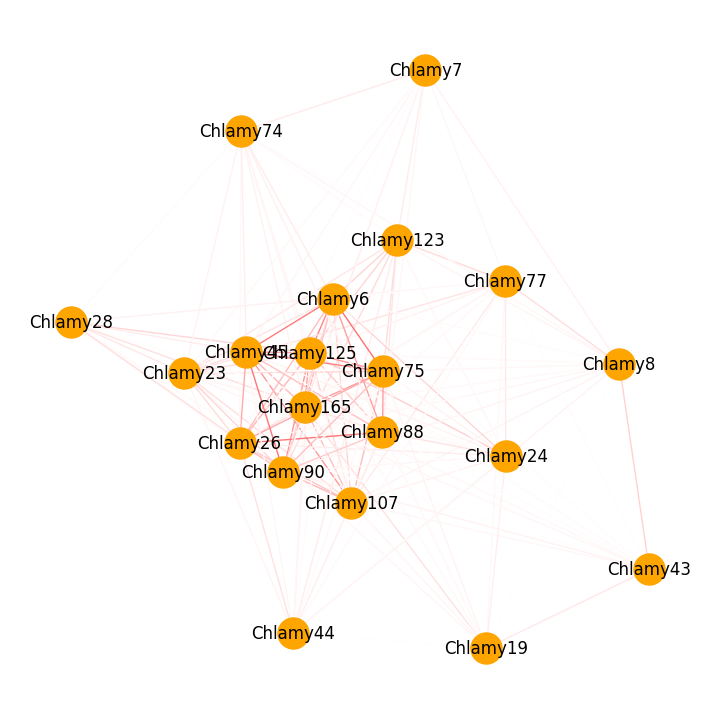

In [92]:

# Construct the co-occurrence network
G = nx.Graph()  # Create an empty undirected graph

# Add nodes
G.add_nodes_from(co_occurrence_matrix.columns)

# Add edges
for i, row in co_occurrence_matrix.iterrows():
    for j, value in row.items():
        if abs(value) > threshold and i != j:  # Check if the co-occurrence score is above the threshold and not self-edge
            G.add_edge(i, j, weight=value)


edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

# Define colors for edges
edge_colors = []

for weight in weights:
    if weight == 1:
        edge_colors.append('red')
    elif weight == -1:
        edge_colors.append('blue')
    elif weight == 0:
        edge_colors.append('white')
    else:
        if weight > 0:
            intensity = 1 - np.abs(weight)
            edge_colors.append((1, intensity, intensity))  # gradient from red to white
            
        else:
            intensity = 1 - np.abs(weight)
            edge_colors.append((intensity, intensity, 1))  # gradient from blue to white


plt.figure(figsize=(7, 7))

nx.draw(G, edge_color=edge_colors, with_labels=True, node_size=500, node_color="orange")

plt.show()

<Axes: xlabel='Chlamy75', ylabel='Chlamy165'>

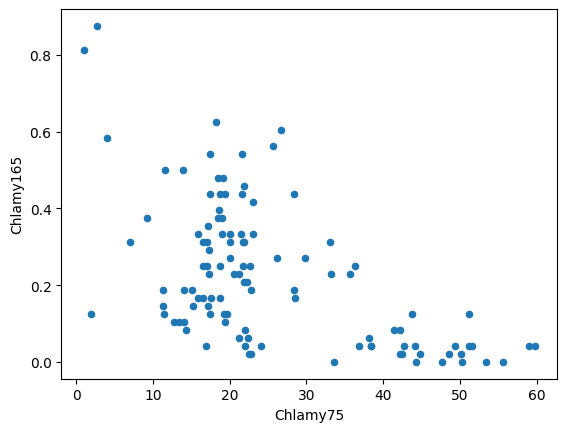

In [93]:
# plot co occurrences

bakti_1 = "Chlamy75"
bakti_2 = "Chlamy165"

pivoted_data.plot.scatter(x=bakti_1 ,y=bakti_2)

In [94]:
bakti_1 = 'Chlamy90'  
bakti_2 = 'Chlamy45'  

mi = mutual_info_regression(pivoted_data[[bakti_1]], pivoted_data[bakti_2])[0]

print(mi)

0.5213144953541056


Custom MI

In [95]:
import itertools

# create funktion

def calc_MI(bakti_1, bakti_2, amount_bins):

    bakti_1_val = pivoted_data[bakti_1].values
    bakti_2_val = pivoted_data[bakti_2].values

    joint_counts = np.histogram2d(bakti_1_val, bakti_2_val, bins = amount_bins)[0]
    joint_probs = joint_counts / np.sum(joint_counts)

    marginal_probs_bakti_1 = np.sum(joint_probs, axis=1)
    marginal_probs_bakti_2 = np.sum(joint_probs, axis=0)

    mutual_info = 0

    for i in range(joint_counts.shape[0]):
        
        for j in range(joint_counts.shape[1]):
            
            if joint_probs[i, j] > 0:

                if marginal_probs_bakti_1[i] > 0 and marginal_probs_bakti_2[j] > 0:
                    
                    mutual_info += joint_probs[i, j] * np.log2(joint_probs[i, j] / (marginal_probs_bakti_1[i] * marginal_probs_bakti_2[j]))

    return(mutual_info)


# create empty matrix

all_baktis = pivoted_data.columns

num_bacteria = len(all_baktis)

MI_matrix = [[0] * num_bacteria for _ in range(num_bacteria)]


# set amount of bins here
amount_bins = 10



# fill with MI values
for i, name1 in enumerate(all_baktis):
    for j, name2 in enumerate(all_baktis):
        if i == j:
            continue
        MI = calc_MI(name1, name2, amount_bins)
        MI_matrix[i][j] = MI

co_occurrence_matrix = pd.DataFrame(MI_matrix, columns=all_baktis, index=all_baktis)

print(co_occurrence_matrix)


ID         Chlamy107  Chlamy123  Chlamy125  Chlamy165  Chlamy19  Chlamy23  \
ID                                                                          
Chlamy107   0.000000   0.149934   0.410880   0.408687  0.196998  0.269146   
Chlamy123   0.149934   0.000000   0.107343   0.316767  0.080739  0.129898   
Chlamy125   0.410880   0.107343   0.000000   0.696894  0.222010  0.208087   
Chlamy165   0.408687   0.316767   0.696894   0.000000  0.268473  0.341065   
Chlamy19    0.196998   0.080739   0.222010   0.268473  0.000000  0.137620   
Chlamy23    0.269146   0.129898   0.208087   0.341065  0.137620  0.000000   
Chlamy24    0.432217   0.069329   0.496619   0.300578  0.144493  0.136630   
Chlamy26    0.604199   0.412956   0.430877   0.464448  0.150061  0.238696   
Chlamy28    0.248503   0.228159   0.292499   0.521217  0.254215  0.330832   
Chlamy43    0.190422   0.020547   0.167941   0.102513  0.114219  0.099327   
Chlamy44    0.285092   0.050318   0.279885   0.215364  0.163505  0.116289   

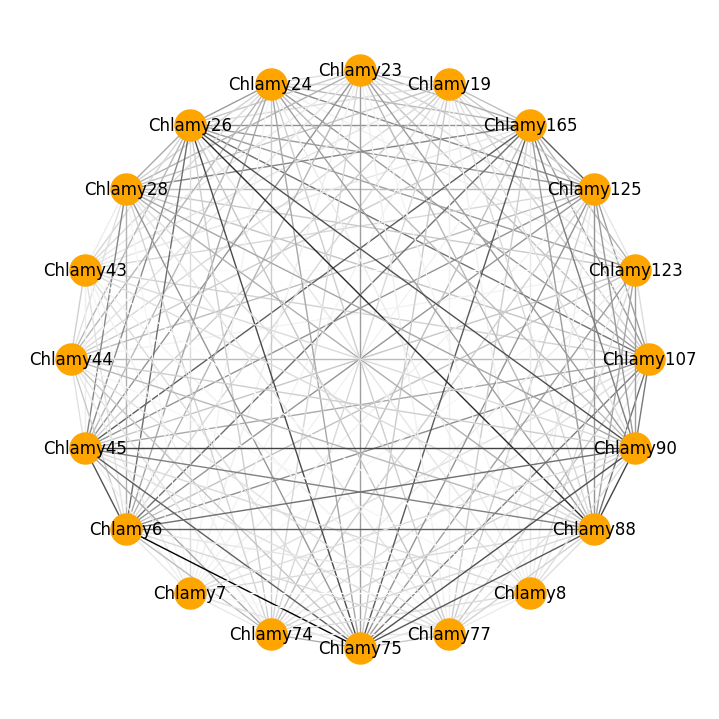

In [96]:


# Define the maximum MI value in your DataFrame
max_MI = co_occurrence_matrix.values.max()

# Construct the co-occurrence network
G = nx.Graph()  # Create an empty undirected graph

# Add nodes
G.add_nodes_from(co_occurrence_matrix.columns)

# Add edges
for i, row in co_occurrence_matrix.iterrows():
    for j, value in row.items():
        if value > 0 and i != j:  # Check if the MI value is positive and not self-edge
            G.add_edge(i, j, weight=value)

edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

# Define colors for edges
edge_colors = []

for weight in weights:
    if weight == 0:
        edge_colors.append('white')
    else:
        intensity = 1 - weight / max_MI  # Calculate intensity based on MI value
        edge_colors.append((intensity, intensity, intensity))  # gradient from black to white

plt.figure(figsize=(7, 7))
pos = nx.circular_layout(G)
nx.draw(G, pos, edge_color=edge_colors, with_labels=True, node_size=500, node_color="orange")
plt.show()


Combine dfs for + or -

In [97]:
positive_negative_df = co_occ_directed.map(lambda x: 1 if x > 0 else -1)

print(positive_negative_df)

ID         Chlamy107  Chlamy123  Chlamy125  Chlamy165  Chlamy19  Chlamy23  \
ID                                                                          
Chlamy107          1          1          1          1         1         1   
Chlamy123          1          1         -1         -1        -1        -1   
Chlamy125          1         -1          1          1         1        -1   
Chlamy165          1         -1          1          1         1         1   
Chlamy19           1         -1          1          1         1         1   
Chlamy23           1         -1         -1          1         1         1   
Chlamy24           1         -1          1          1         1        -1   
Chlamy26           1          1          1         -1         1        -1   
Chlamy28          -1          1         -1          1         1         1   
Chlamy43           1         -1          1          1         1         1   
Chlamy44           1         -1          1          1         1         1   

In [98]:
co_occ_with_negatives = co_occurrence_matrix * positive_negative_df

print(co_occ_with_negatives)

ID         Chlamy107  Chlamy123  Chlamy125  Chlamy165  Chlamy19  Chlamy23  \
ID                                                                          
Chlamy107   0.000000   0.149934   0.410880   0.408687  0.196998  0.269146   
Chlamy123   0.149934   0.000000  -0.107343  -0.316767 -0.080739 -0.129898   
Chlamy125   0.410880  -0.107343   0.000000   0.696894  0.222010 -0.208087   
Chlamy165   0.408687  -0.316767   0.696894   0.000000  0.268473  0.341065   
Chlamy19    0.196998  -0.080739   0.222010   0.268473  0.000000  0.137620   
Chlamy23    0.269146  -0.129898  -0.208087   0.341065  0.137620  0.000000   
Chlamy24    0.432217  -0.069329   0.496619   0.300578  0.144493 -0.136630   
Chlamy26    0.604199   0.412956   0.430877  -0.464448  0.150061 -0.238696   
Chlamy28   -0.248503   0.228159  -0.292499   0.521217  0.254215  0.330832   
Chlamy43    0.190422  -0.020547   0.167941   0.102513  0.114219  0.099327   
Chlamy44    0.285092  -0.050318   0.279885   0.215364  0.163505  0.116289   

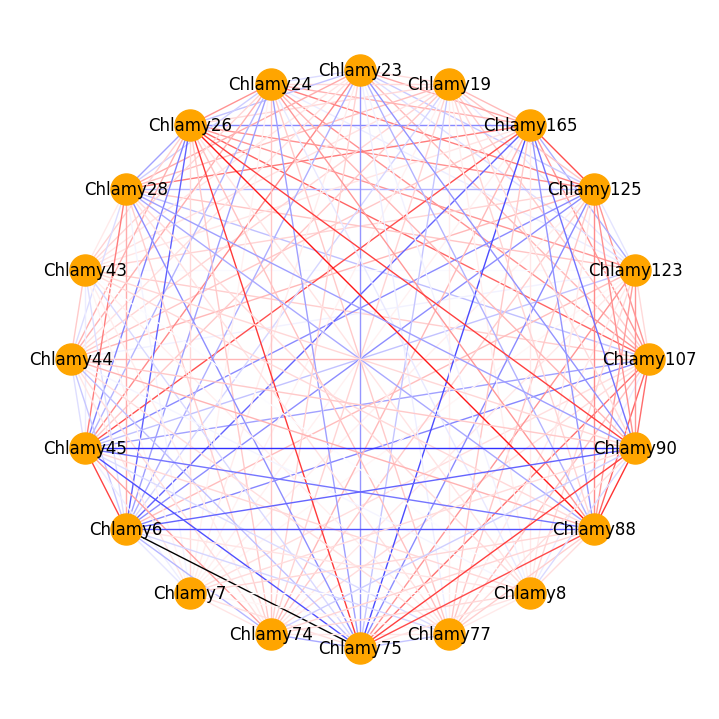

In [99]:
# use bins < 10 for this


# Construct the co-occurrence network
G = nx.Graph()  # Create an empty undirected graph

# Add nodes
G.add_nodes_from(co_occ_with_negatives.columns)

# Add edges (co-occurrence relationships) to the graph
for i, row in co_occ_with_negatives.iterrows():
    for j, value in row.items():
        if abs(value) > threshold and i != j:  # Check if the co-occurrence score is above the threshold and not self-edge
            G.add_edge(i, j, weight=value)


edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

# Define colors for edges
edge_colors = []

for weight in weights:
    if weight == 1:
        edge_colors.append('red')
    elif weight == -1:
        edge_colors.append('blue')
    elif weight == 0:
        edge_colors.append('white')
    elif weight < -1:
        edge_colors.append("purple")
    elif weight > 1:
        edge_colors.append("black")
    else:
        if weight > 0:
            intensity = 1 - np.abs(weight)
            edge_colors.append((1, intensity, intensity))  # gradient from red to white
            
        else:
            intensity = 1 - np.abs(weight)
            edge_colors.append((intensity, intensity, 1))  # gradient from blue to white

# Draw the graph

plt.figure(figsize=(7, 7))

nx.draw(G, pos=nx.circular_layout(G), edge_color=edge_colors, with_labels=True, node_size=500, node_color="orange")

plt.show()

In [100]:
max_MI = np.abs(co_occ_with_negatives.values).max()

print(max_MI)

1.0904394802532167


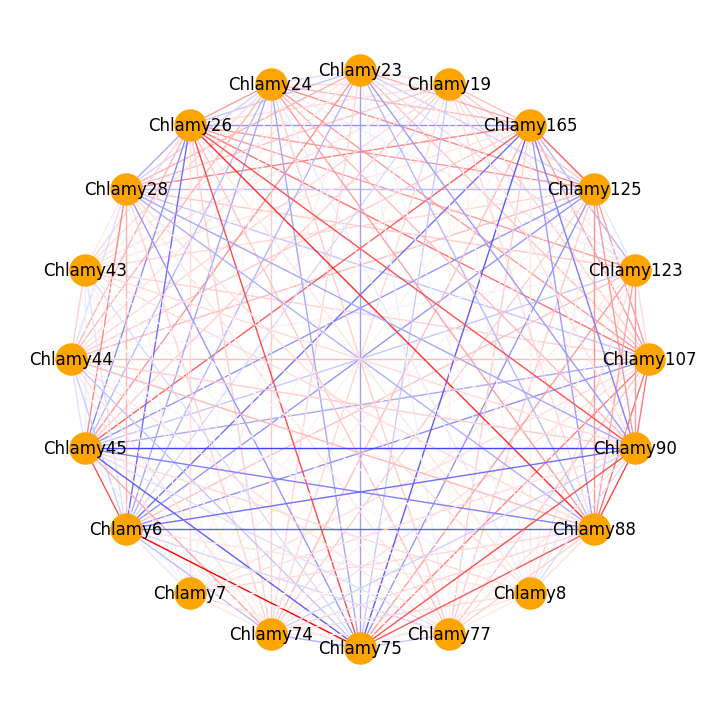

In [101]:
# normalized so now its fine for bins > 10


# Construct the co-occurrence network
G = nx.Graph()  # Create an empty undirected graph

# Add nodes 
G.add_nodes_from(co_occ_with_negatives.columns)

# Add edges (co-occurrence relationships) to the graph
for i, row in co_occ_with_negatives.iterrows():
    for j, value in row.items():
        if abs(value) > threshold and i != j:  # Check if the co-occurrence score is above the threshold and not self-edge
            G.add_edge(i, j, weight=value)



edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

# normalize by dividing by greatest existing value
max_MI = np.abs(co_occ_with_negatives.values).max()

normalized_weights = [x / max_MI for x in weights]

# Define colors for edges
edge_colors = []

for weight in normalized_weights:
    if weight == 1:
        edge_colors.append('red')
    elif weight == -1:
        edge_colors.append('blue')
    elif weight == 0:
        edge_colors.append('white')
    else:
        if weight > 0:
            intensity = 1 - np.abs(weight)
            edge_colors.append((1, intensity, intensity))  # gradient from red to white
            
        else:
            intensity = 1 - np.abs(weight)
            edge_colors.append((intensity, intensity, 1))  # gradient from blue to white

# Draw the graph

plt.figure(figsize=(7, 7))

nx.draw(G, pos=nx.circular_layout(G), edge_color=edge_colors, with_labels=True, node_size=500, node_color="orange")

plt.show()

In [2]:
pip install nbconvert[webpdf]


   ---------------------------------------- 0.0/29.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/29.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/29.7 MB 435.7 kB/s eta 0:01:09
   ---------------------------------------- 0.1/29.7 MB 1.3 MB/s eta 0:00:23
   ---------------------------------------- 0.3/29.7 MB 2.2 MB/s eta 0:00:14
    --------------------------------------- 0.4/29.7 MB 2.3 MB/s eta 0:00:13
    --------------------------------------- 0.7/29.7 MB 2.9 MB/s eta 0:00:10
   - -------------------------------------- 0.8/29.7 MB 2.9 MB/s eta 0:00:10
   - -------------------------------------- 1.1/29.7 MB 3.2 MB/s eta 0:00:09
   - -------------------------------------- 1.4/29.7 MB 3.6 MB/s eta 0:00:08
   -- ------------------------------------- 1.6/29.7 MB 3.8 MB/s eta 0:00:08
   -- ------------------------------------- 1.9/29.7 MB 4.0 MB/s eta 0:00:07
   -- ------------------------------------- 2.2/29.7 MB 4.2 MB/s eta 0:00:07
   --- ----